# Evaluation of parameters

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy as sp
import scipy.stats

#from sklearn.preprocessing import StandardScaler
from data_preprocess import Preprocessor
from tools import Tools
from model import Model
import matplotlib.pylab as plt

import shutil

In [97]:
df = pd.read_csv("test_parameters.csv")
columns = df.columns.tolist()
print(columns)

['Unnamed: 0', 'Batchsize', 'CUT_OFF_Classes', 'Epochs', 'act', 'align', 'batch_nr_in_epoch', 'dropout', 'file', 'highest_acc', 'learning_rate', 'len_train', 'loss', 'lstm_hidden_layers', 'lstm_units', 'model', 'nr_classes', 'nr_joints', 'test_acc', 'train_acc', 'optimizer', 'regularization', '1st_conv_filters', '1st_conv_kernel', '2nd_conv_filter', '2nd_conv_kernel', '1st_hidden_dense', '2nd_hidden_dense']


[ 0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57
  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57
  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57
  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.57  0.58  0.58
  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58
  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58
  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58
  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58
  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58
  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58
  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58
  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58
  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58
  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0.58  0

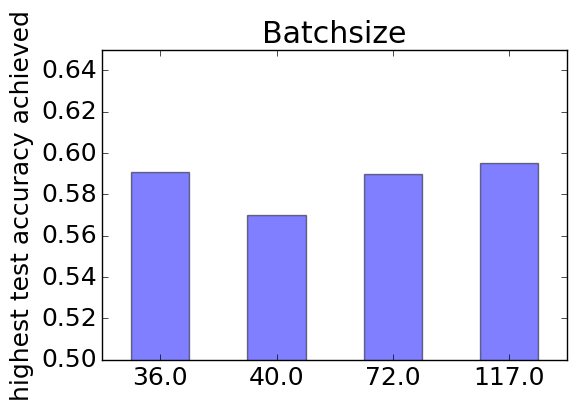

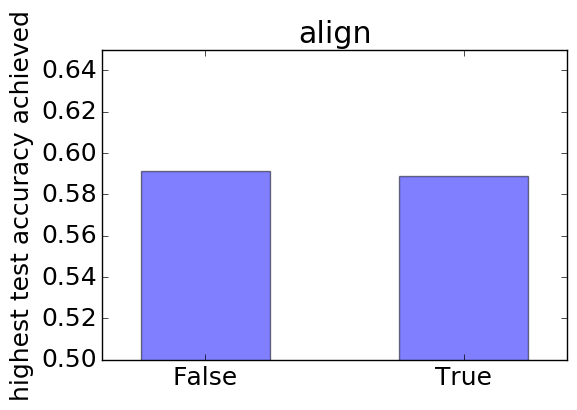

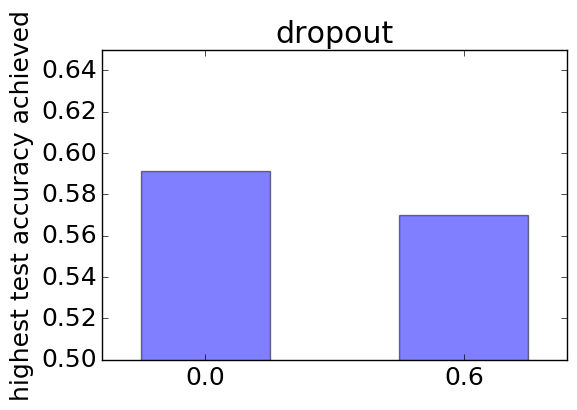

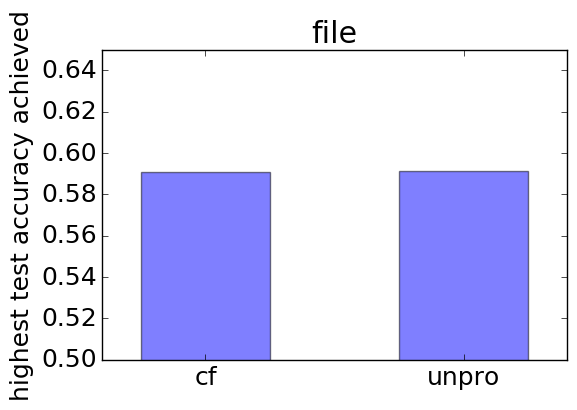

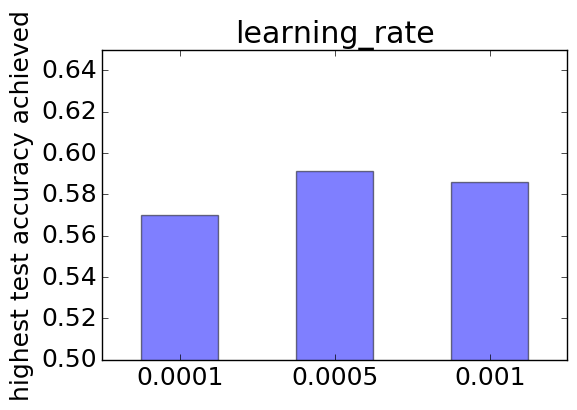

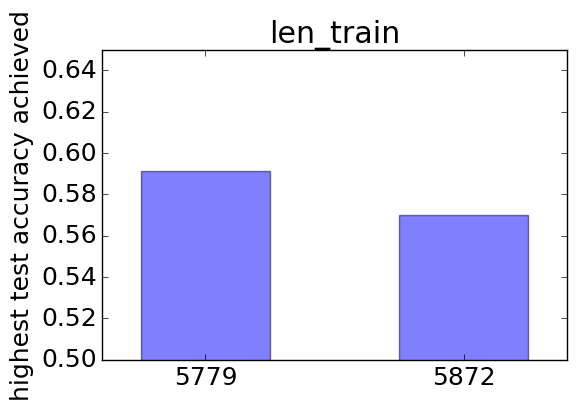

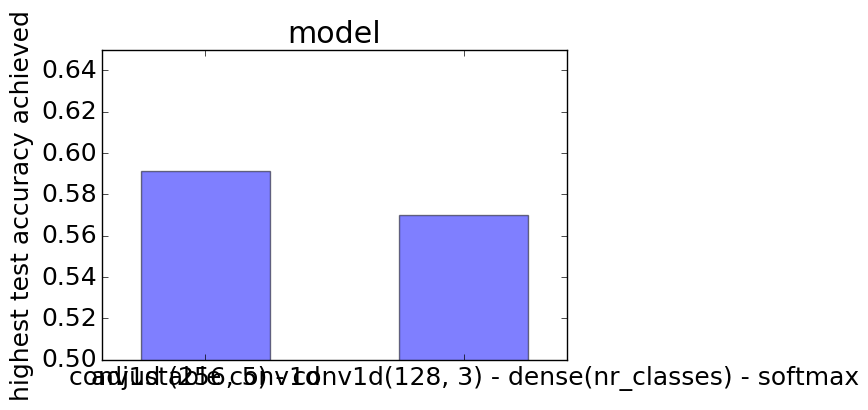

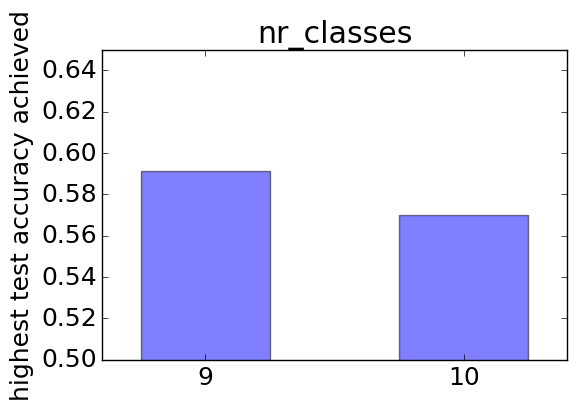

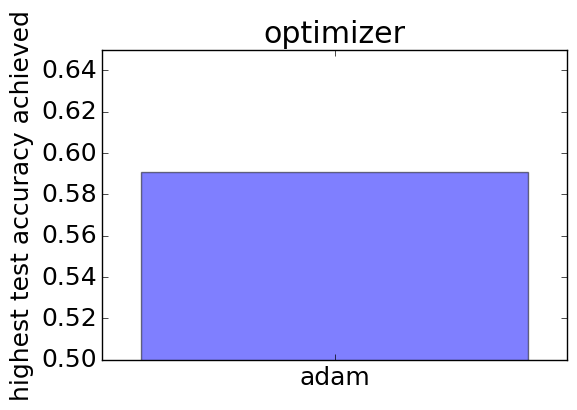

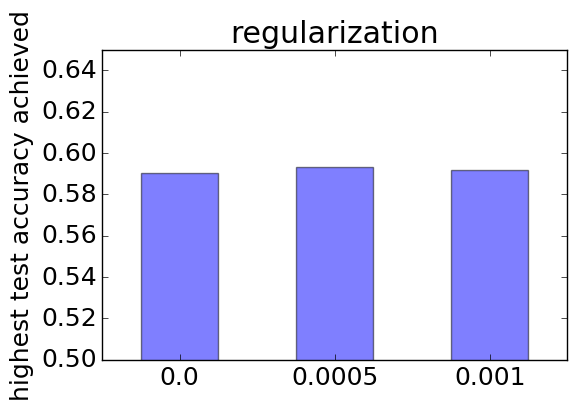

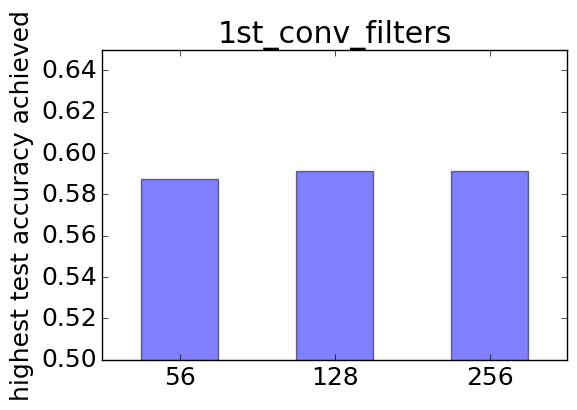

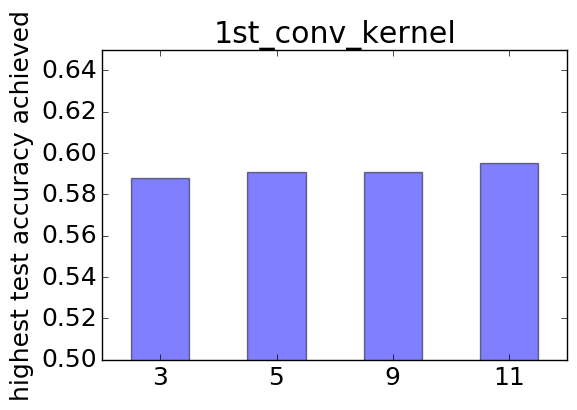

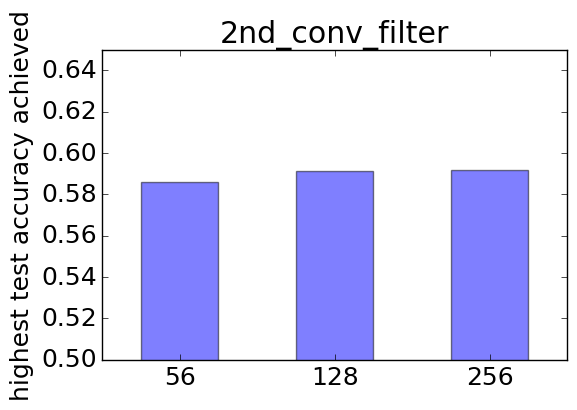

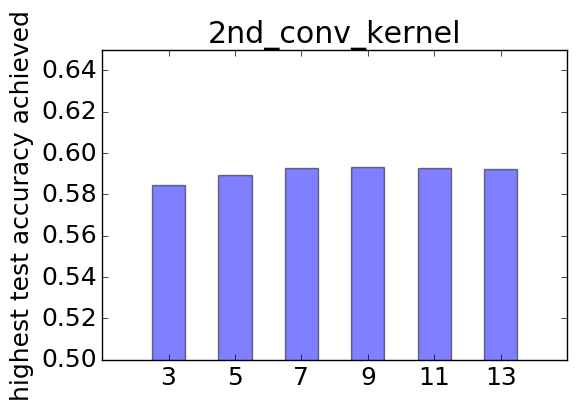

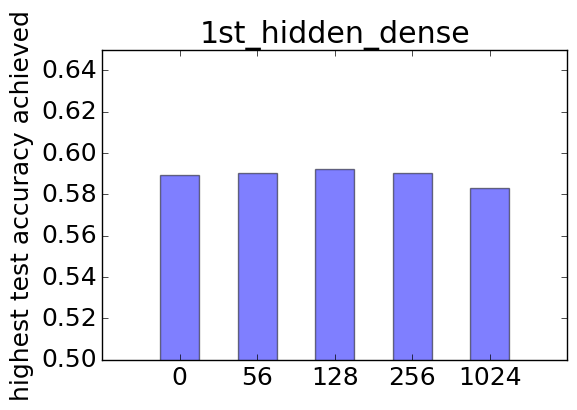

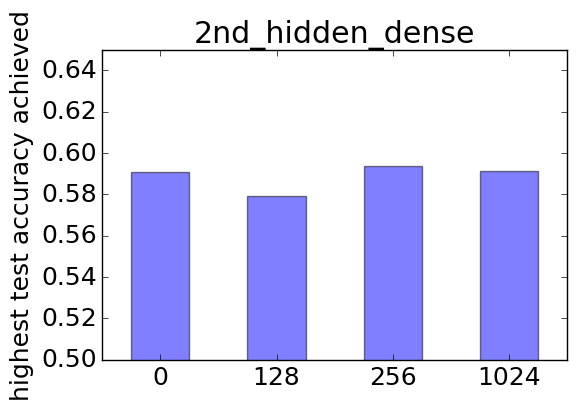

In [101]:

#df = df.sort_values(by = "highest_acc")
#print(len(df))
#df = df.drop(df.index[range(450)])
#acc = df["highest_acc"].values
print(acc)
columns = ['Batchsize', 'align', 'dropout', 'file', 'learning_rate', 'len_train', 
           'model', 'nr_classes', 'optimizer', 'regularization', 
           '1st_conv_filters', '1st_conv_kernel', '2nd_conv_filter', '2nd_conv_kernel', '1st_hidden_dense', 
           '2nd_hidden_dense']
#'lstm_hidden_layers', 'lstm_units', 

plt.rcParams.update({'font.size': 18})
for col in columns:
    act = np.unique(df[col].values)
    cut = [np.mean((df[df[col]==elem])["highest_acc"].values) for elem in act]

    plt.figure()
    plt.ylim([0.5,0.65])
    y_pos = range(len(act))
    plt.bar(y_pos, cut, align='center', alpha=0.5, width = 0.5)
    #plt.ylim([0,350])
    plt.xticks(y_pos, act)
    plt.ylabel('highest test accuracy achieved')
    plt.title(col)
    plt.show()

## Try to relate two different parametes to each other

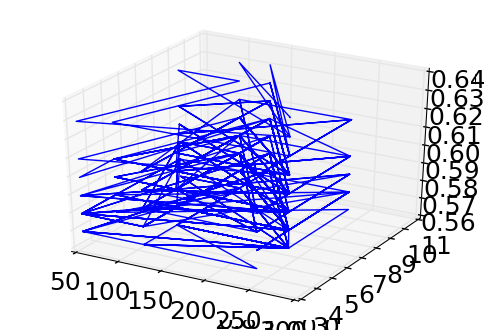

In [106]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
X = df["1st_conv_filters"].values
Y = df['1st_conv_kernel'].values
#X, Y = np.meshgrid(X, Y)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot(X, Y, df["highest_acc"].values)
#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Coordinate trajectories

In [4]:
import numpy as np
data = np.load("interpolated.npy")

In [5]:
from data_preprocess import Preprocessor
pre = Preprocessor("unprocessed_data.csv")
pre.remove_small_classes(50)
labels = pre.get_labels()
print(data.shape)
print(labels.shape)

/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (254,255,256,257,258,259,260,290) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


csv eingelesen with length  13150
Only Pitcher rows
[['Changeup' 491]
 ['Curveball' 627]
 ['Eephus' 1]
 ['Fastball (2-seam)' 1341]
 ['Fastball (4-seam)' 2075]
 ['Fastball (Cut)' 287]
 ['Fastball (Split-finger)' 49]
 ['Knuckle curve' 73]
 ['Knuckleball' 350]
 ['Sinker' 265]
 ['Slider' 913]
 ['Unknown Pitch Type' 103]]
Removed because not enought class members:  ['Eephus' 'Fastball (Split-finger)'] Unknown Pitch Type
(6422, 167, 12, 2)
(6422,)


In [17]:
unique = np.unique(labels)
index_liste = []
for pitches in unique:
    index_liste.append(np.where(labels==pitches))

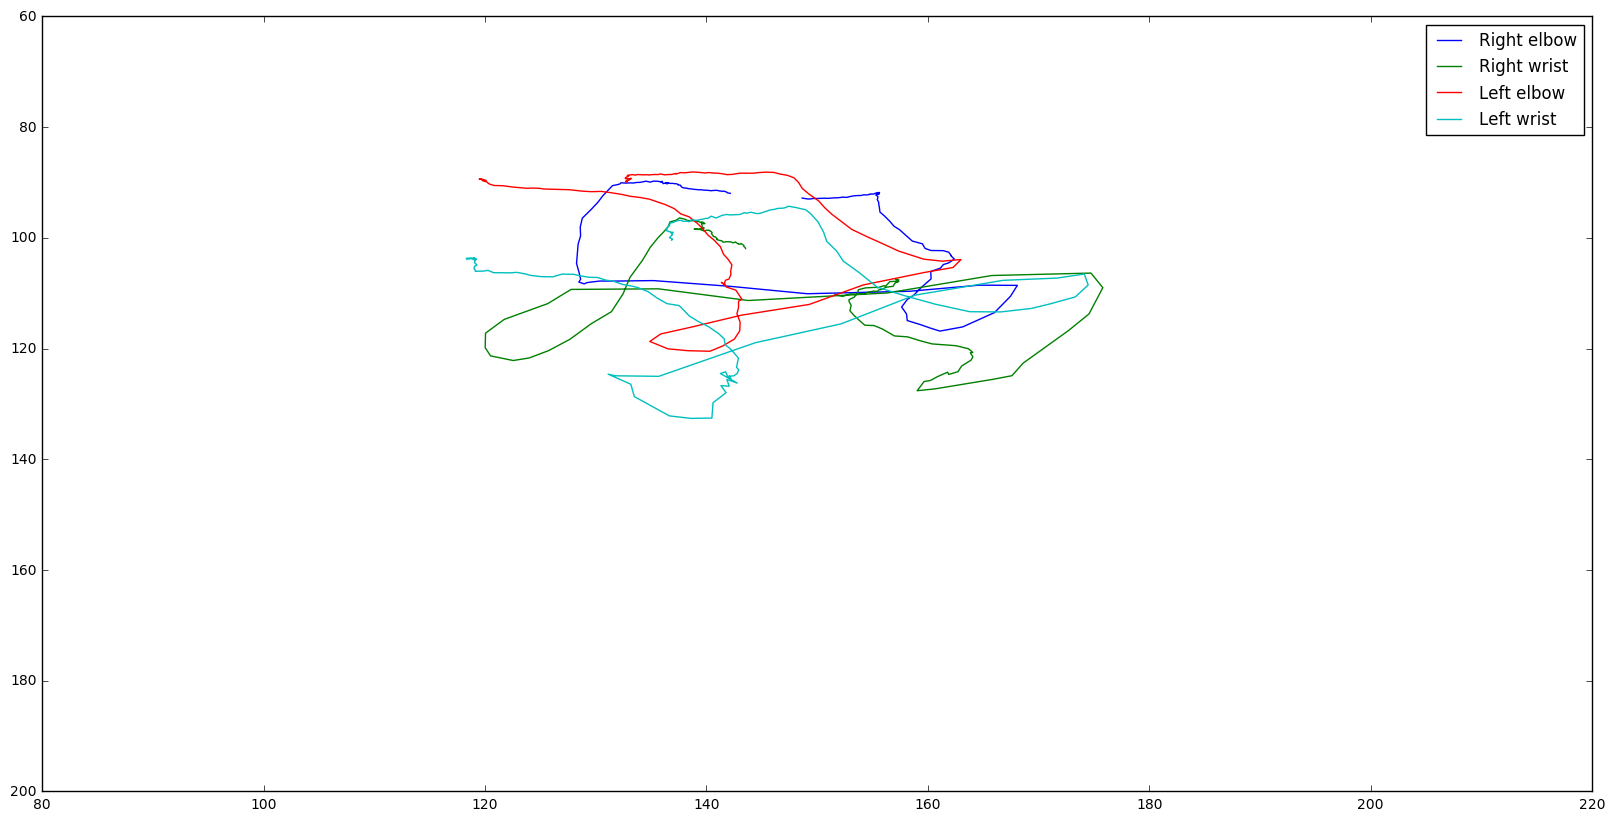

Mixed pitch types  std_sum:  148.42627267 anzahl:  100


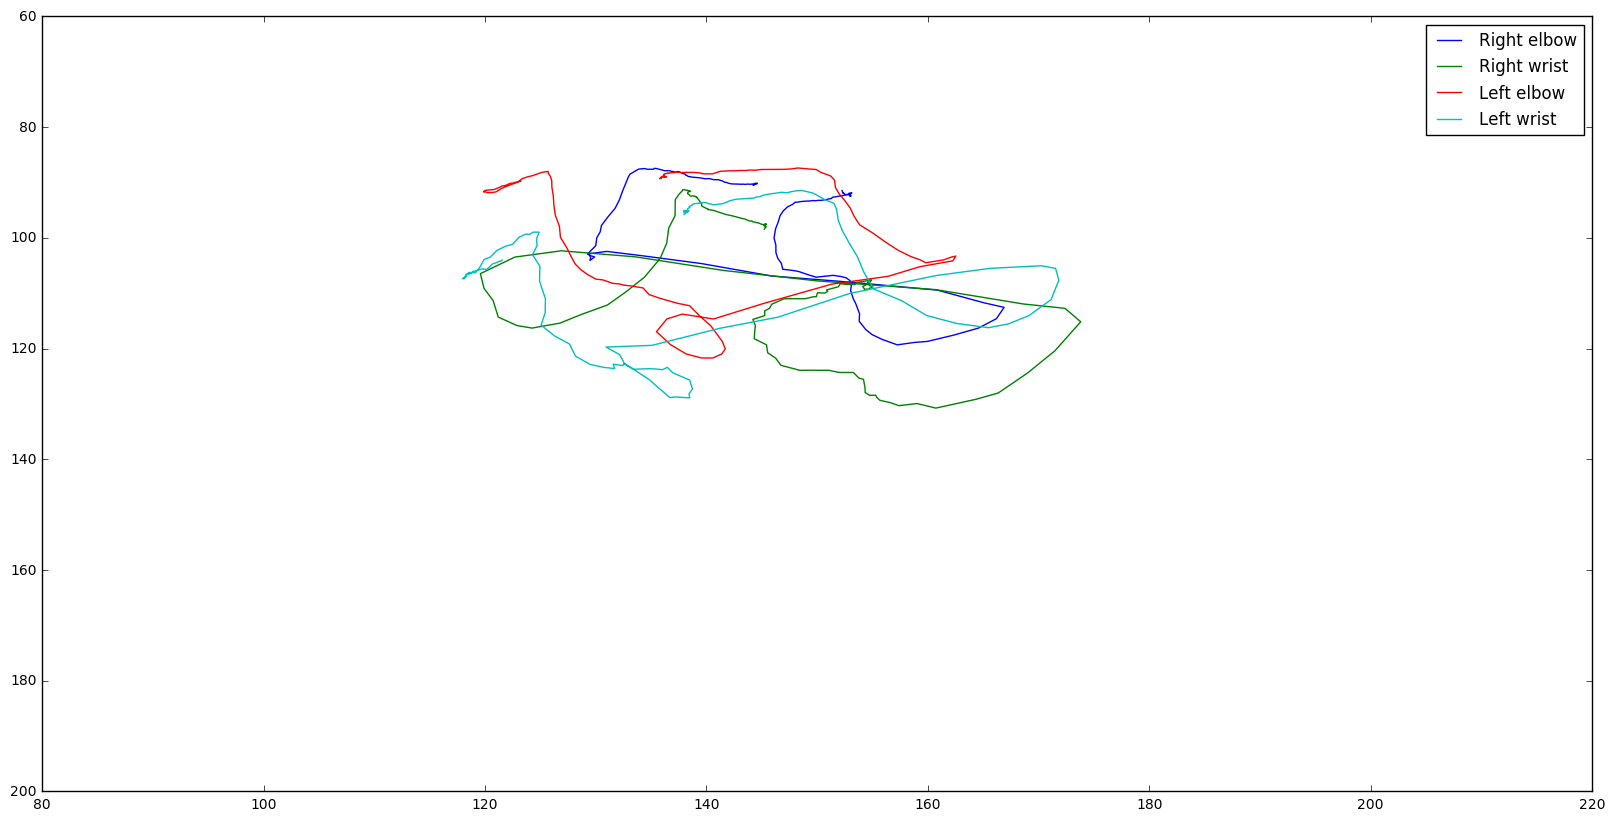

Changeup std_sum:  133.18681283 anzahl:  100


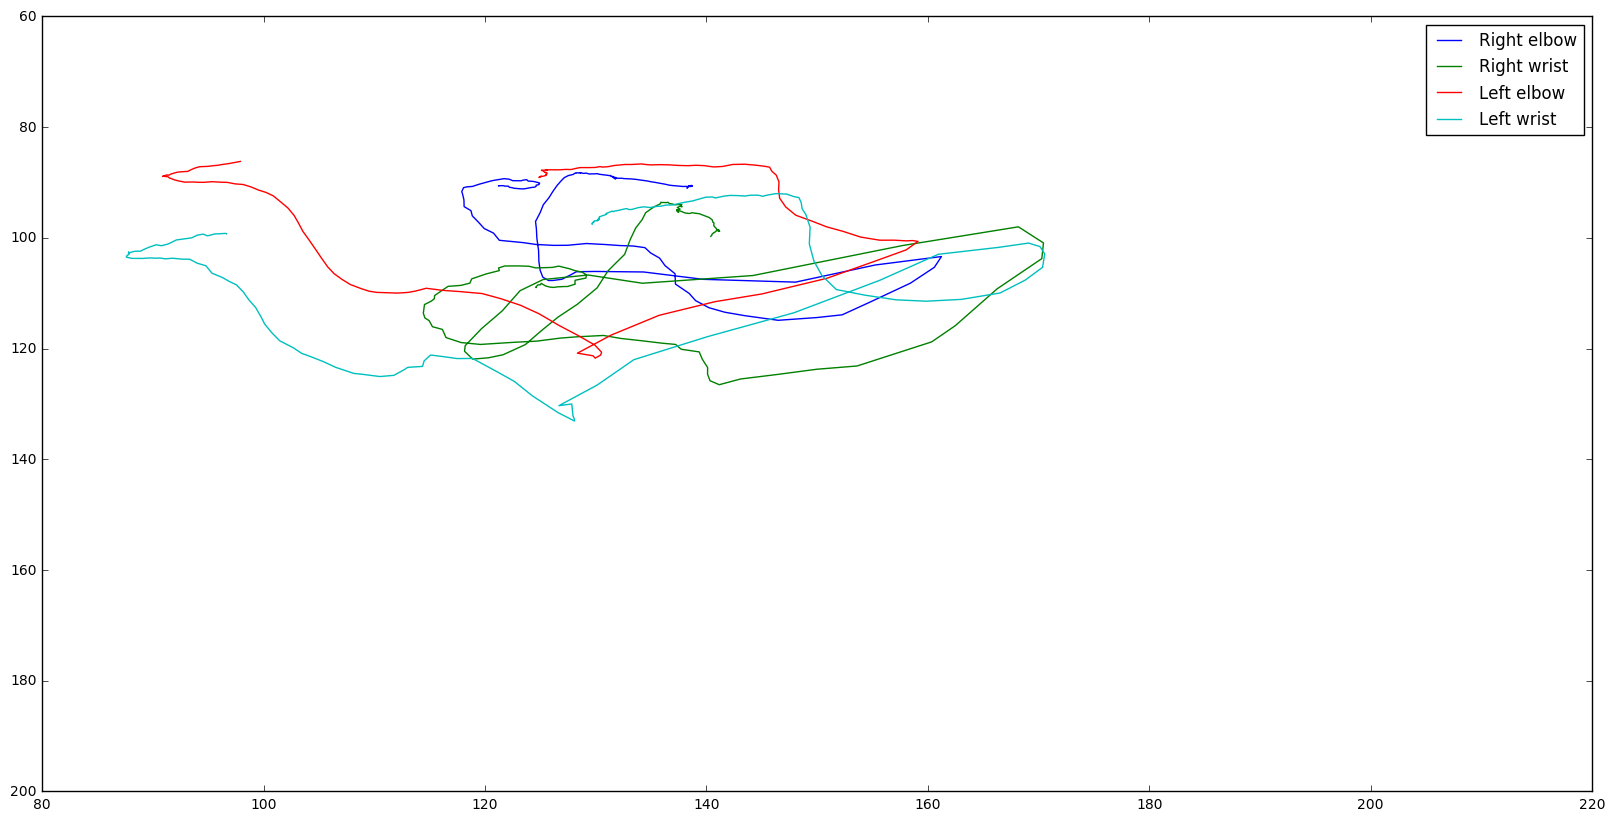

Curveball std_sum:  129.847675974 anzahl:  100


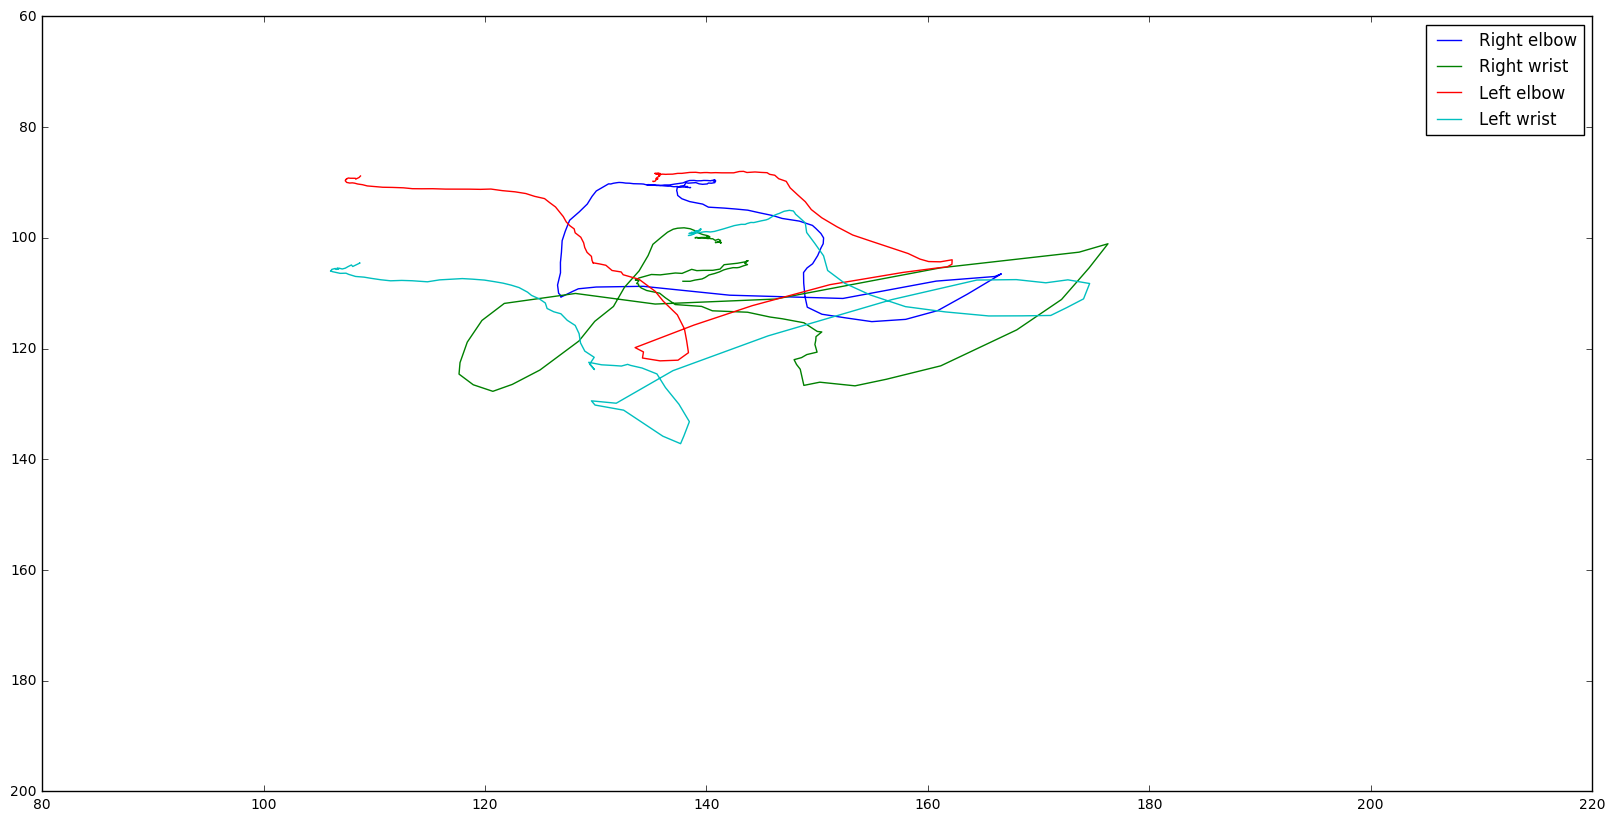

Fastball (2-seam) std_sum:  144.749862044 anzahl:  100
SAME AGAIN BUT ORHER EXAMPLES:


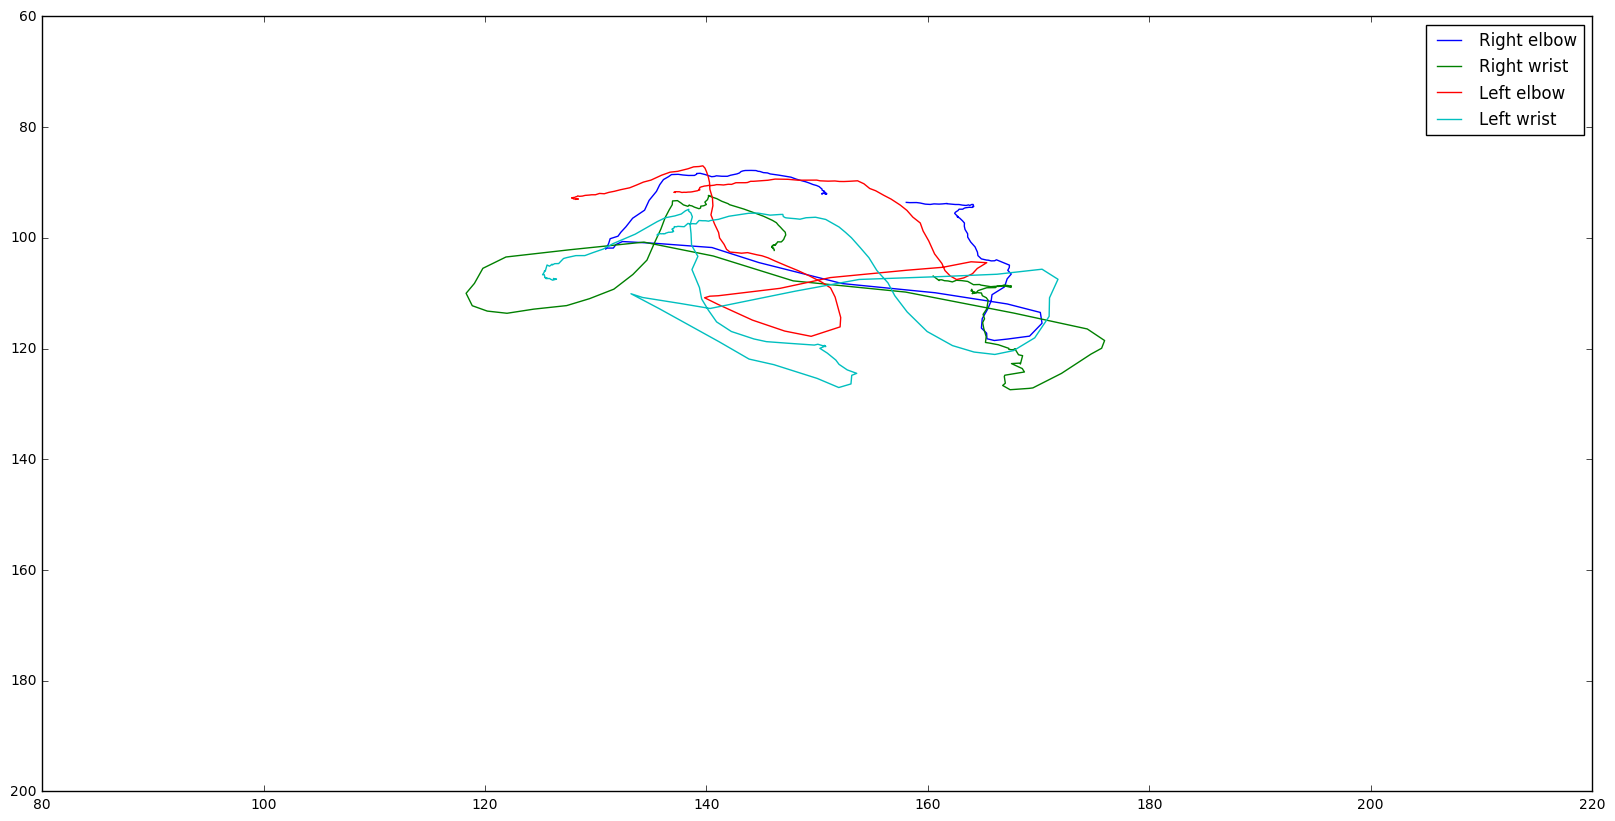

Fastball (2-seam) std_sum:  137.1670422 anzahl:  100


In [31]:
import matplotlib.pylab as plt
joints=["Right shoulder", "Left shoulder", "Right elbow", "Right wrist","Left elbow", "Left wrist",
        "Right hip", "Right knee", "Right ankle", "Left hip", "Left knee", "Left ankle", "Neck ", 
        "Right eye", "Right ear","Left eye", "Left ear"]
from tools import Tools
aligned = Tools.align_frames(data, pre.get_release_frame(60, 120), 60, 40)
ALIGNING = False
ERRORBAR = False
START_JOINT = 2
NR_JOINTS = 4
nr_examples = 100

stds = 0
index = np.random.choice(data.shape[0], nr_examples)
if ALIGNING:
    frame = aligned[index]
else:
    frame = data[index]
#print(labels[10])
#print(len(np.mean(frame[:, :, 6+i,1], axis = 0)))
plt.figure(figsize=(20,10))
for i in range(NR_JOINTS):
    x = frame[:, :, START_JOINT+i,1]
    y = frame[:, :, START_JOINT+i,0]
    meX = np.mean(x, axis = 0)
    meY = np.mean(y, axis = 0)
    stdX = np.std(x, axis = 0)
    stdY = np.std(y, axis = 0)
    stds+= np.mean(stdX)+np.mean(stdY)
    plt.plot(meX, meY, label=joints[START_JOINT+i])
    if ERRORBAR:
        plt.errorbar(meX, meY, yerr = stdY, xerr = stdX, label=joints[START_JOINT+i])
plt.ylim(200, 60)
plt.xlim(80,220)
plt.legend()
plt.show()
print("Mixed pitch types ", "std_sum: ", stds, "anzahl: ", len(frame))

# ONLY FASTBALL 2 SEAM

for j in range(3):
    stds = 0
    index = index_liste[j][0][:nr_examples]
    #print(indizes)
    #print(len(frame))
    if ALIGNING:
        frame = aligned[index]
    else:
        frame = data[index]
    #print(unique[0], len(frame))
    #print(len(np.mean(frame[:, :, 6+i,1], axis = 0)))
    plt.figure(figsize=(20,10))
    for i in range(NR_JOINTS):
        x = frame[:, :, START_JOINT+i,1]
        y = frame[:, :, START_JOINT+i,0]
        meX = np.mean(x, axis = 0)
        meY = np.mean(y, axis = 0)
        stdX = np.std(x, axis = 0)
        stdY = np.std(y, axis = 0)
        stds+= np.mean(stdX)+np.mean(stdY)
        plt.plot(meX, meY, label=joints[2+i])
        if ERRORBAR:
            plt.errorbar(meX, meY, yerr = stdY, xerr = stdX, label=joints[START_JOINT+i])
    plt.ylim(200, 60)
    plt.xlim(80,220)
    plt.legend()
    plt.show()
    print(unique[j],"std_sum: ", stds, "anzahl: ", len(frame))

"""TO SEE INTRA CLASS DIFFERENCES:"""
print("SAME AGAIN BUT ORHER EXAMPLES:")
stds = 0
index = index_liste[2][0][100:100+nr_examples]
#print(len(frame))
if ALIGNING:
    frame = aligned[index]
else:
    frame = data[index]
#print(unique[0], len(frame))
#print(len(np.mean(frame[:, :, 6+i,1], axis = 0)))
plt.figure(figsize=(20,10))
for i in range(NR_JOINTS):
    x = frame[:, :, START_JOINT+i,1]
    y = frame[:, :, START_JOINT+i,0]
    meX = np.mean(x, axis = 0)
    meY = np.mean(y, axis = 0)
    stdX = np.std(x, axis = 0)
    stdY = np.std(y, axis = 0)
    stds+= np.mean(stdX)+np.mean(stdY)
    plt.plot(meX, meY, label=joints[START_JOINT+i])
    if ERRORBAR:
        plt.errorbar(meX, meY, yerr = stdY, xerr = stdX, label=joints[6+i])
plt.ylim(200, 60)
plt.xlim(80,220)
plt.legend()
plt.show()
print(unique[2],"std_sum: ", stds, "anzahl: ", len(frame))

## Results
STD is a bit smaller if videos are aligned

# Testing different interpolation/smoothing

In [29]:
data = np.load("unpro_all_coord.npy")
import matplotlib.pylab as plt
from scipy import interpolate
from scipy import ndimage

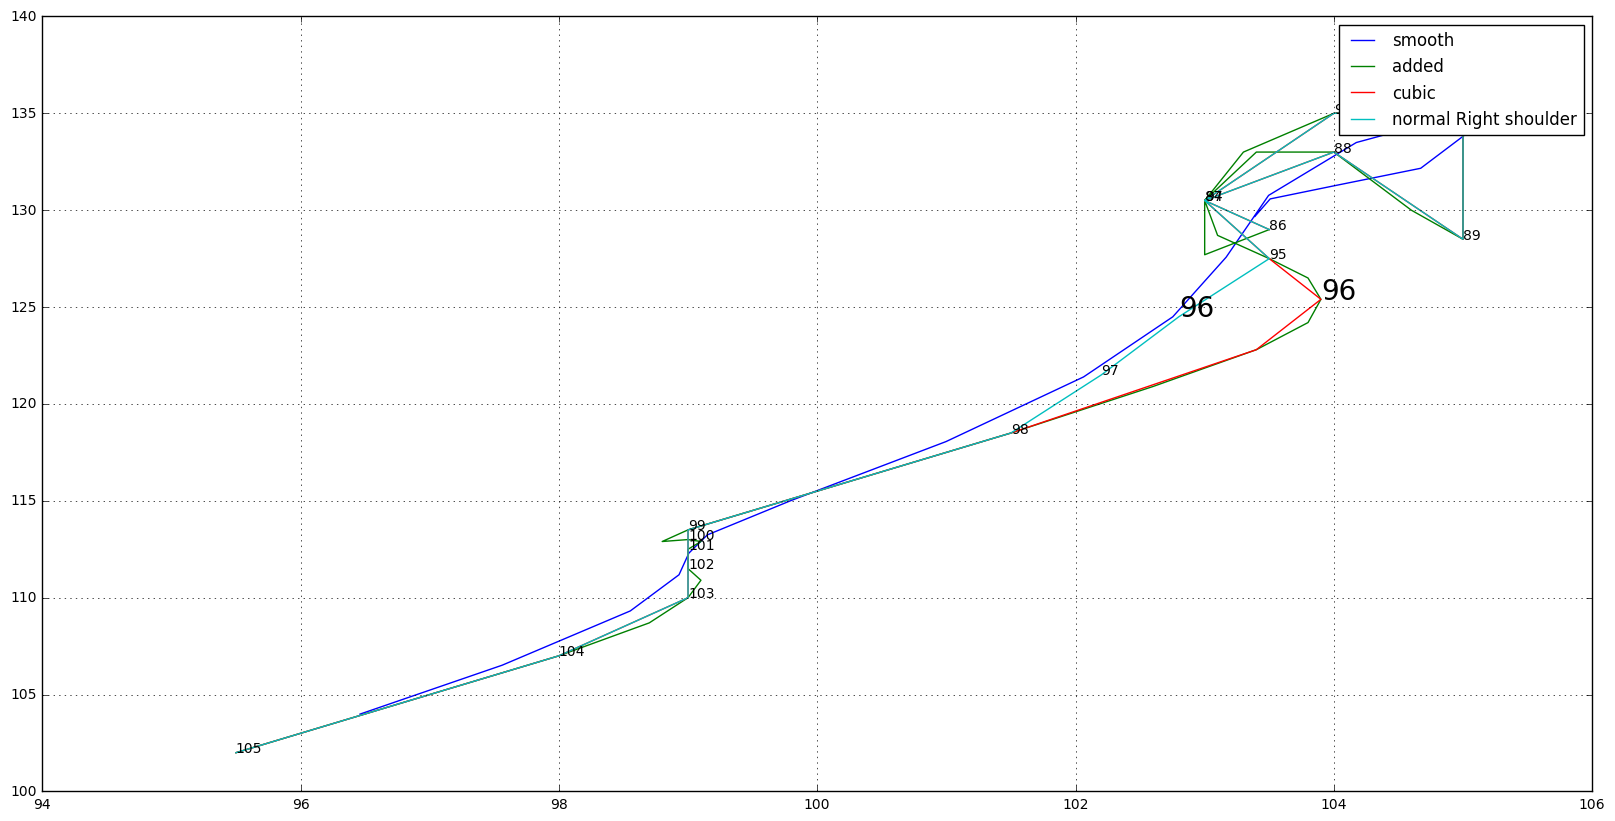

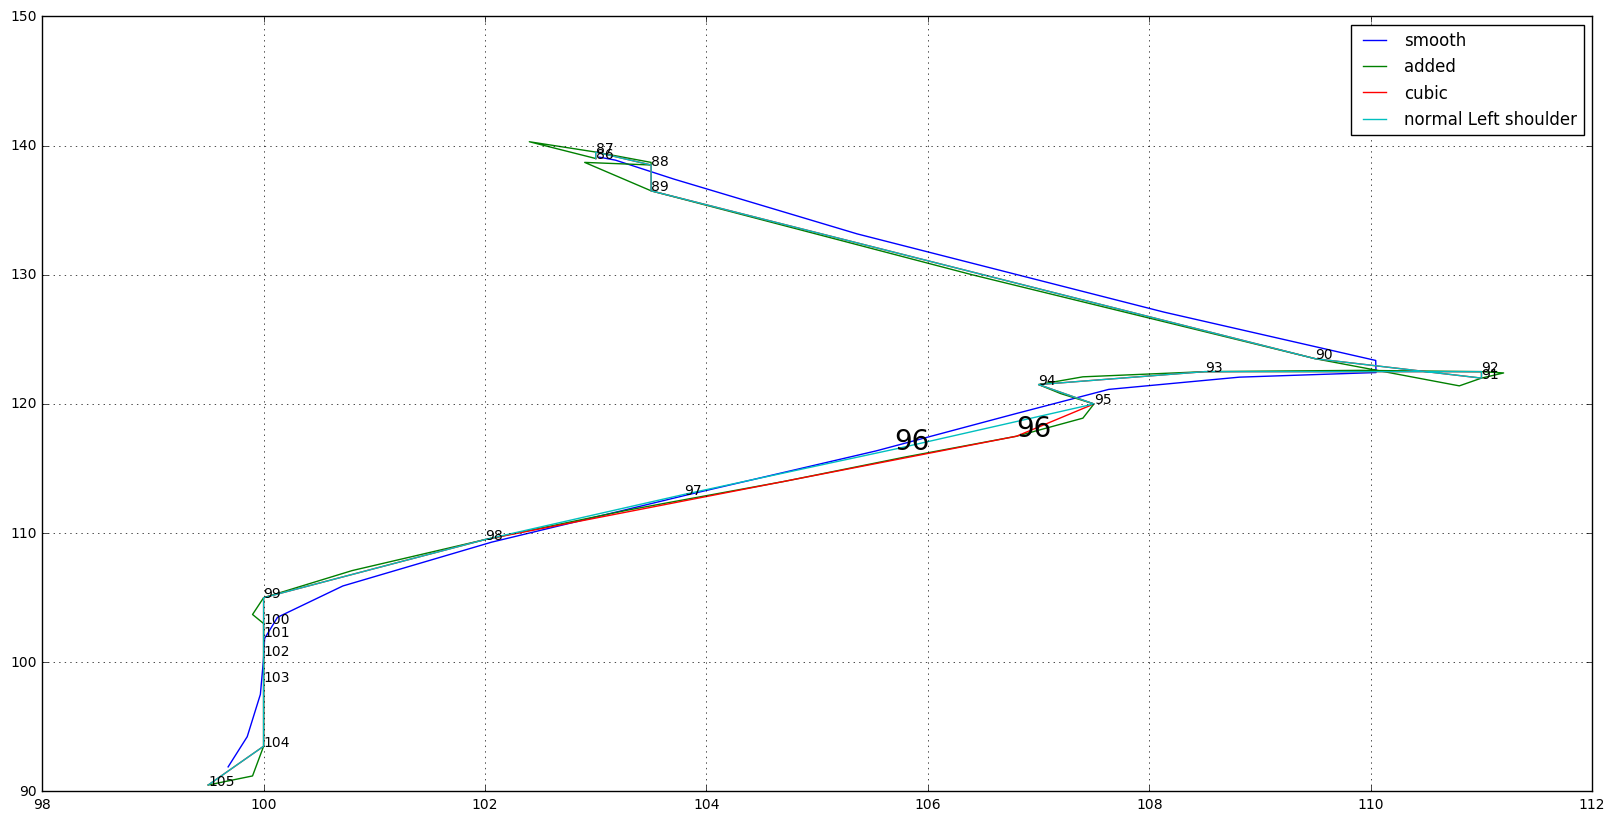

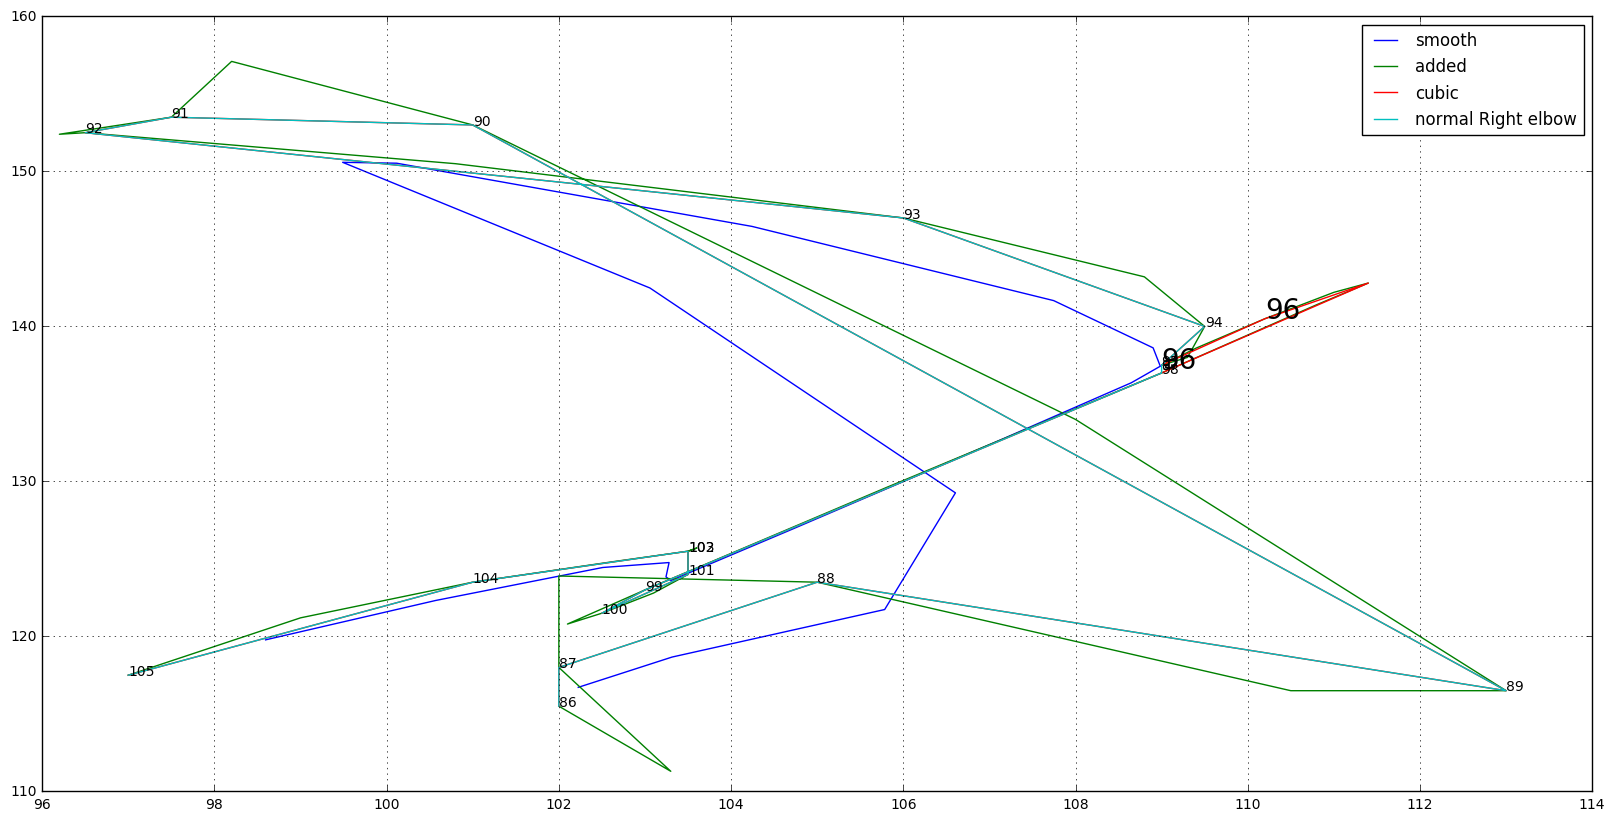

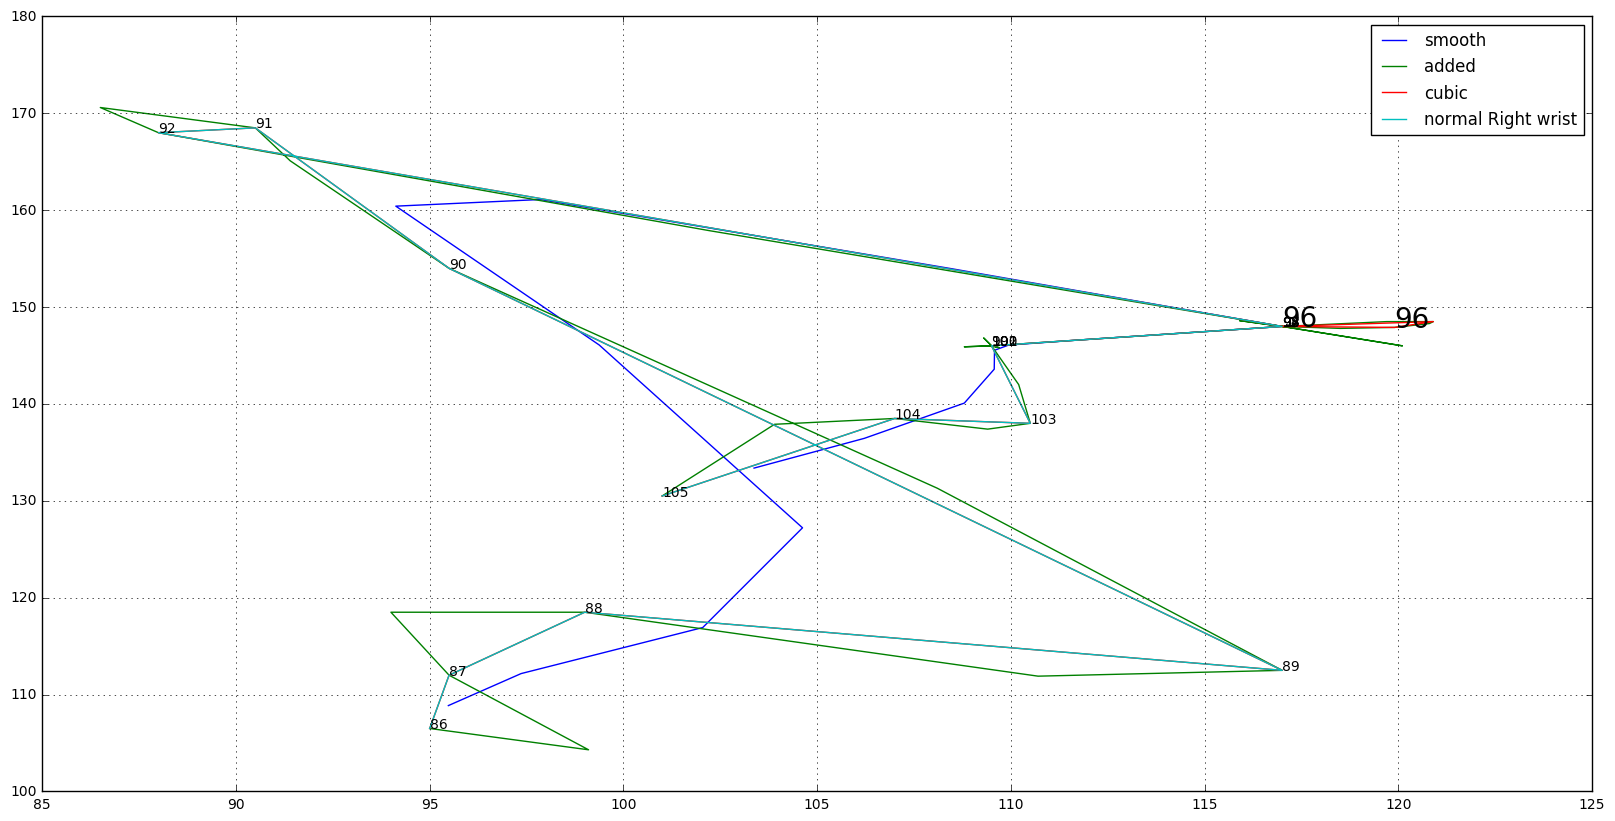

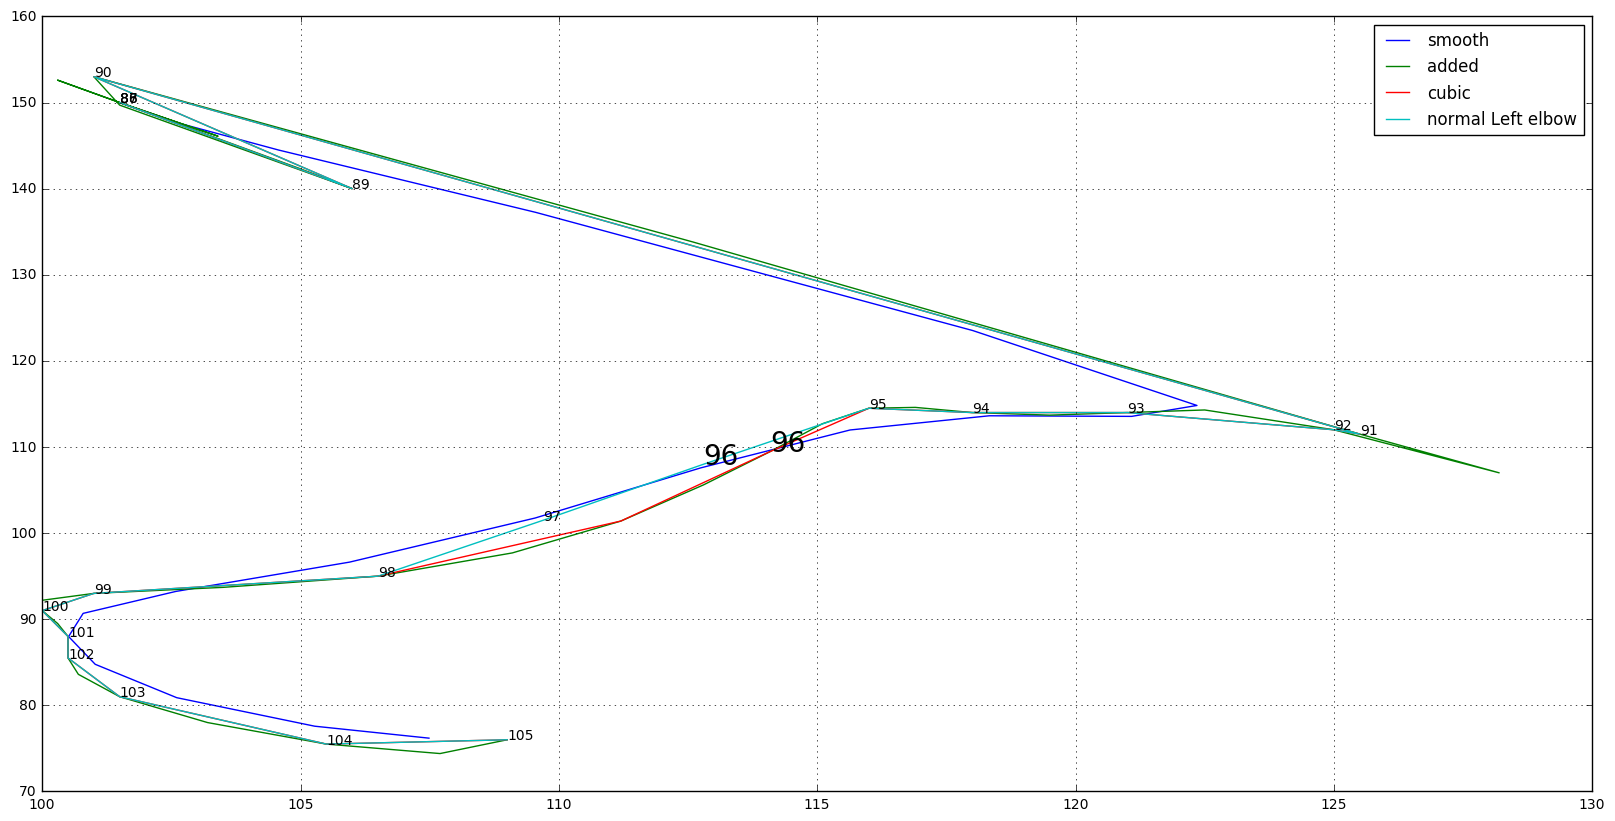

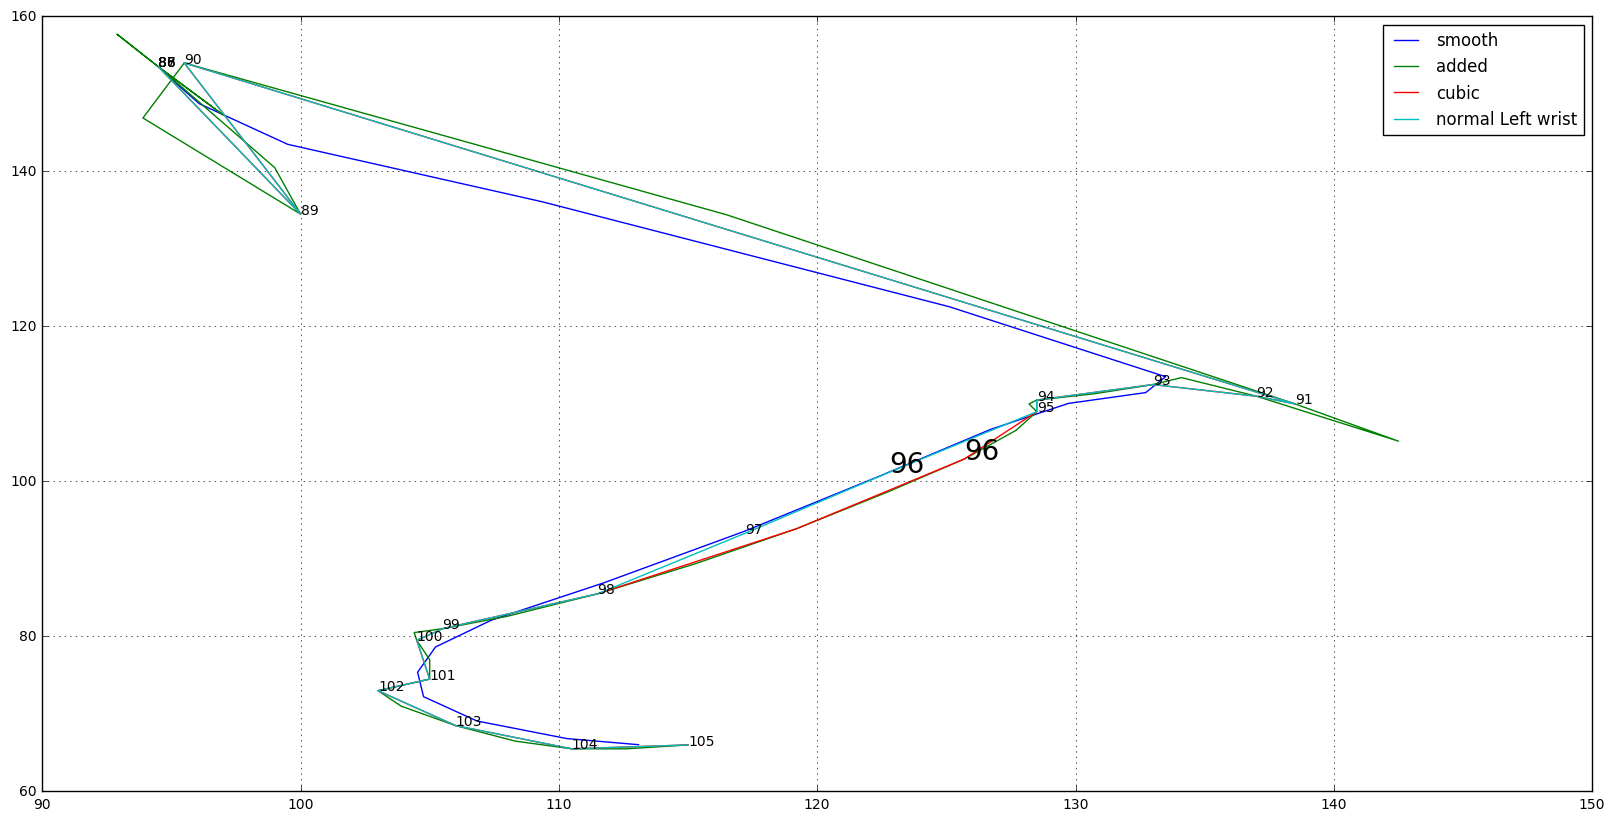

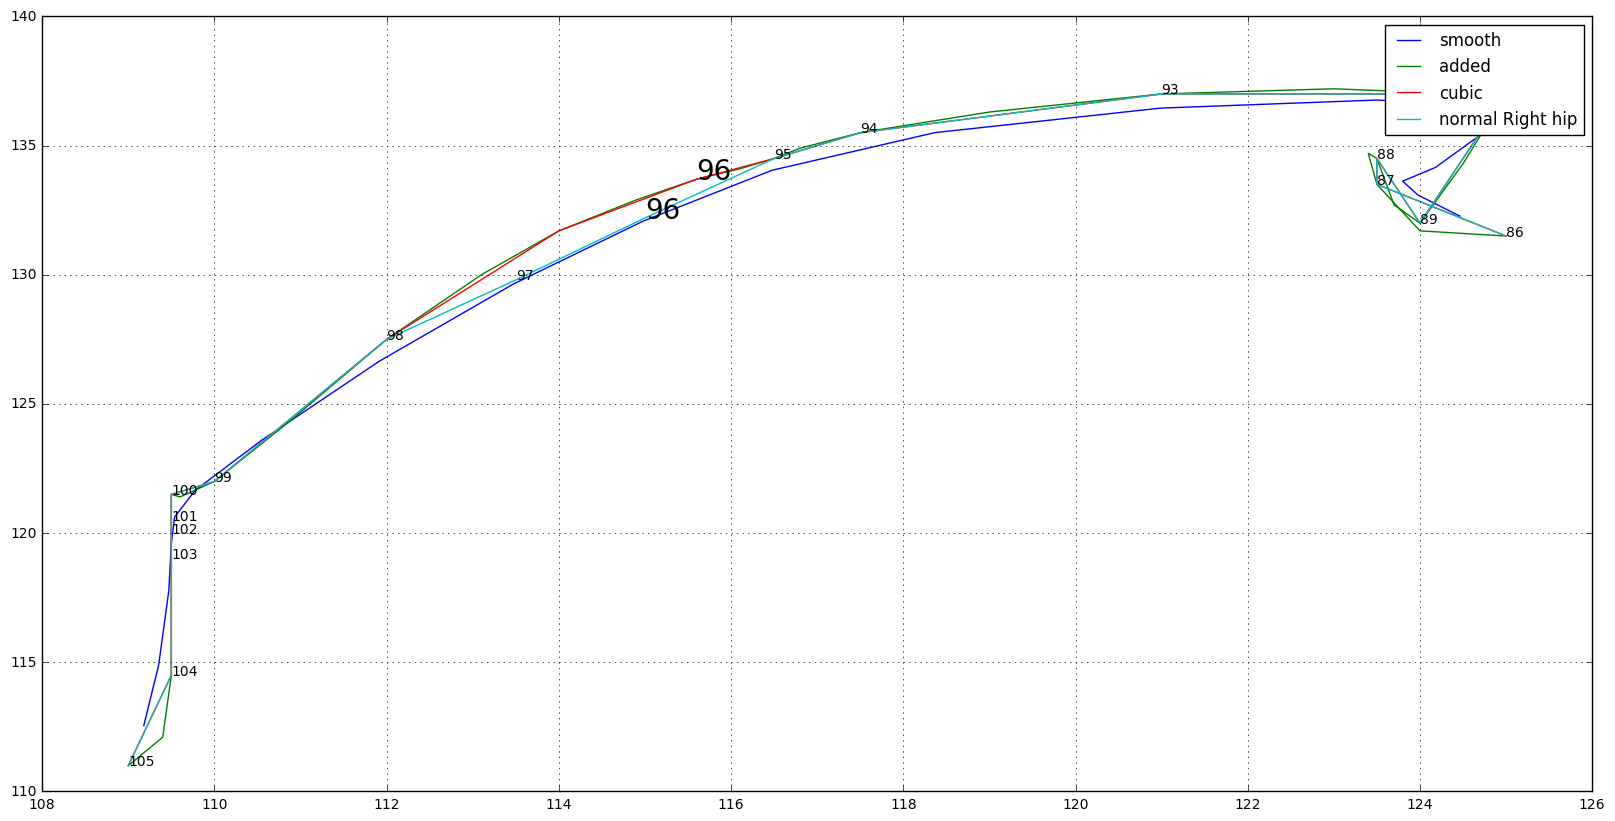

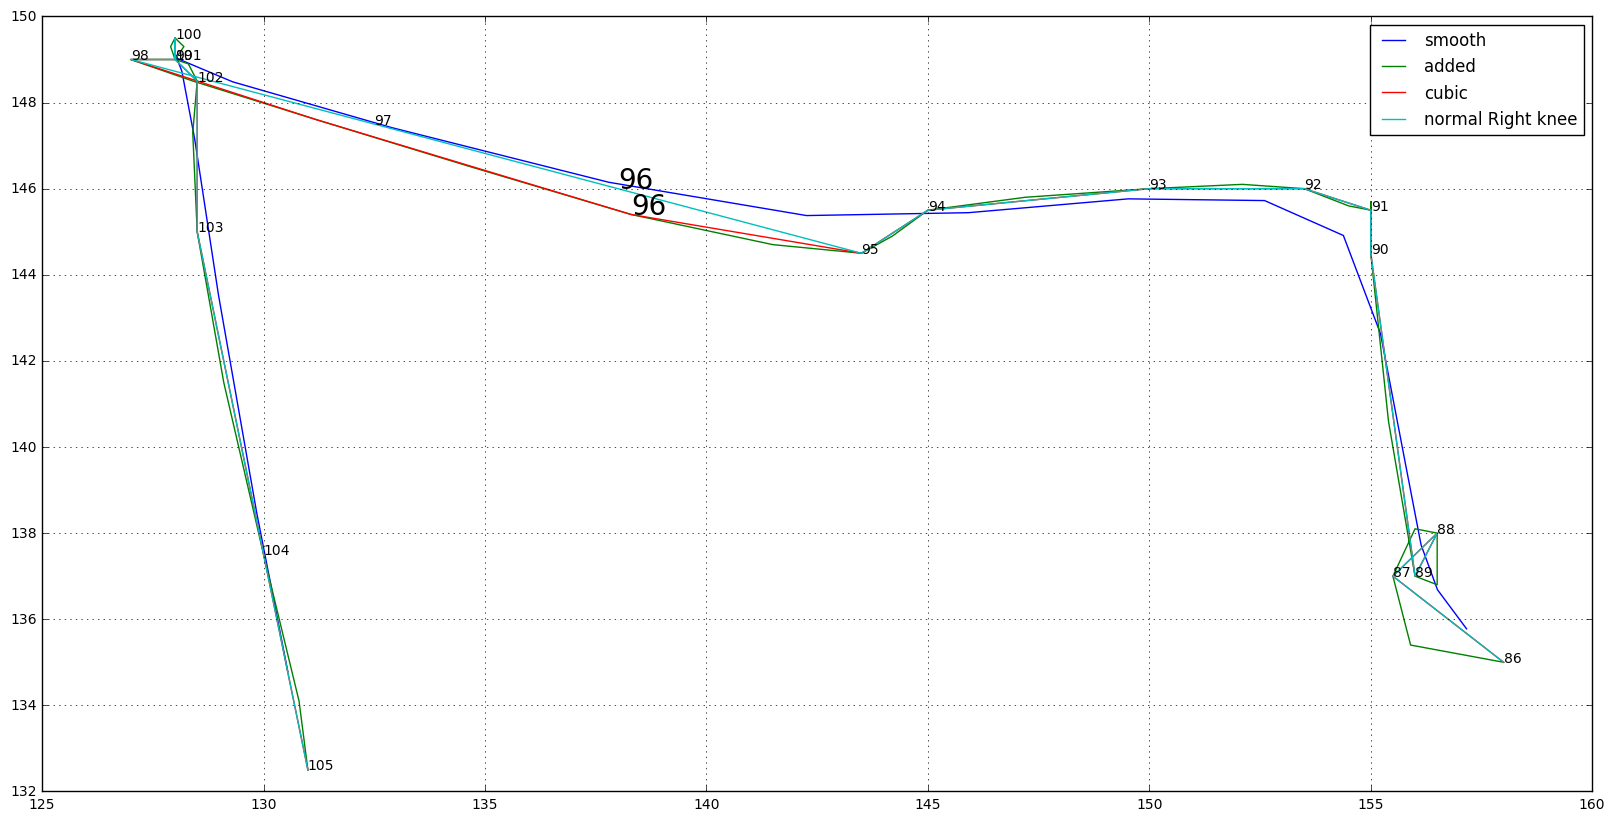

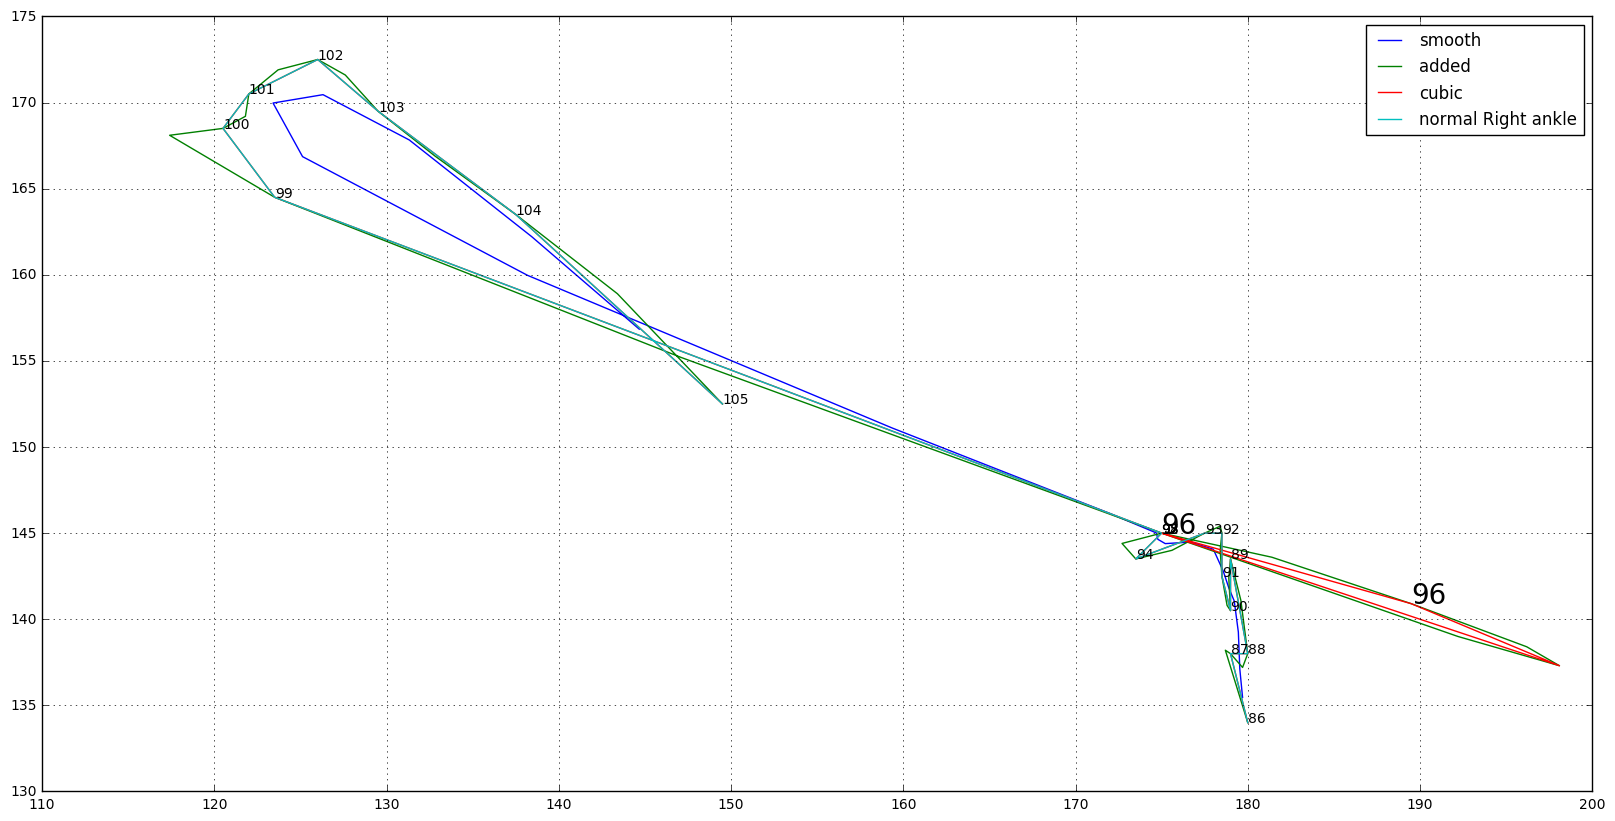

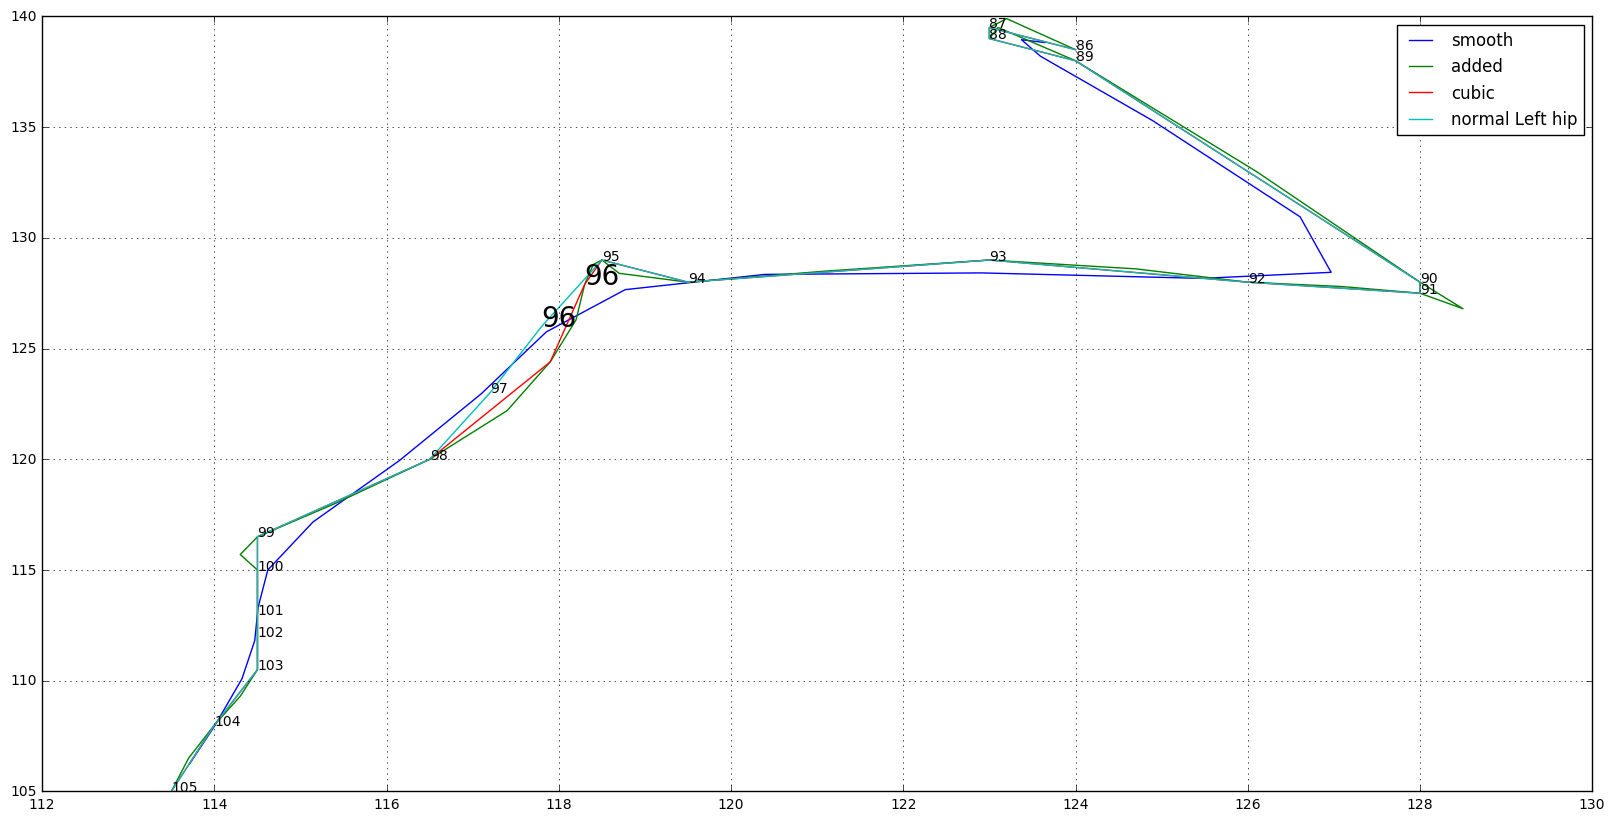

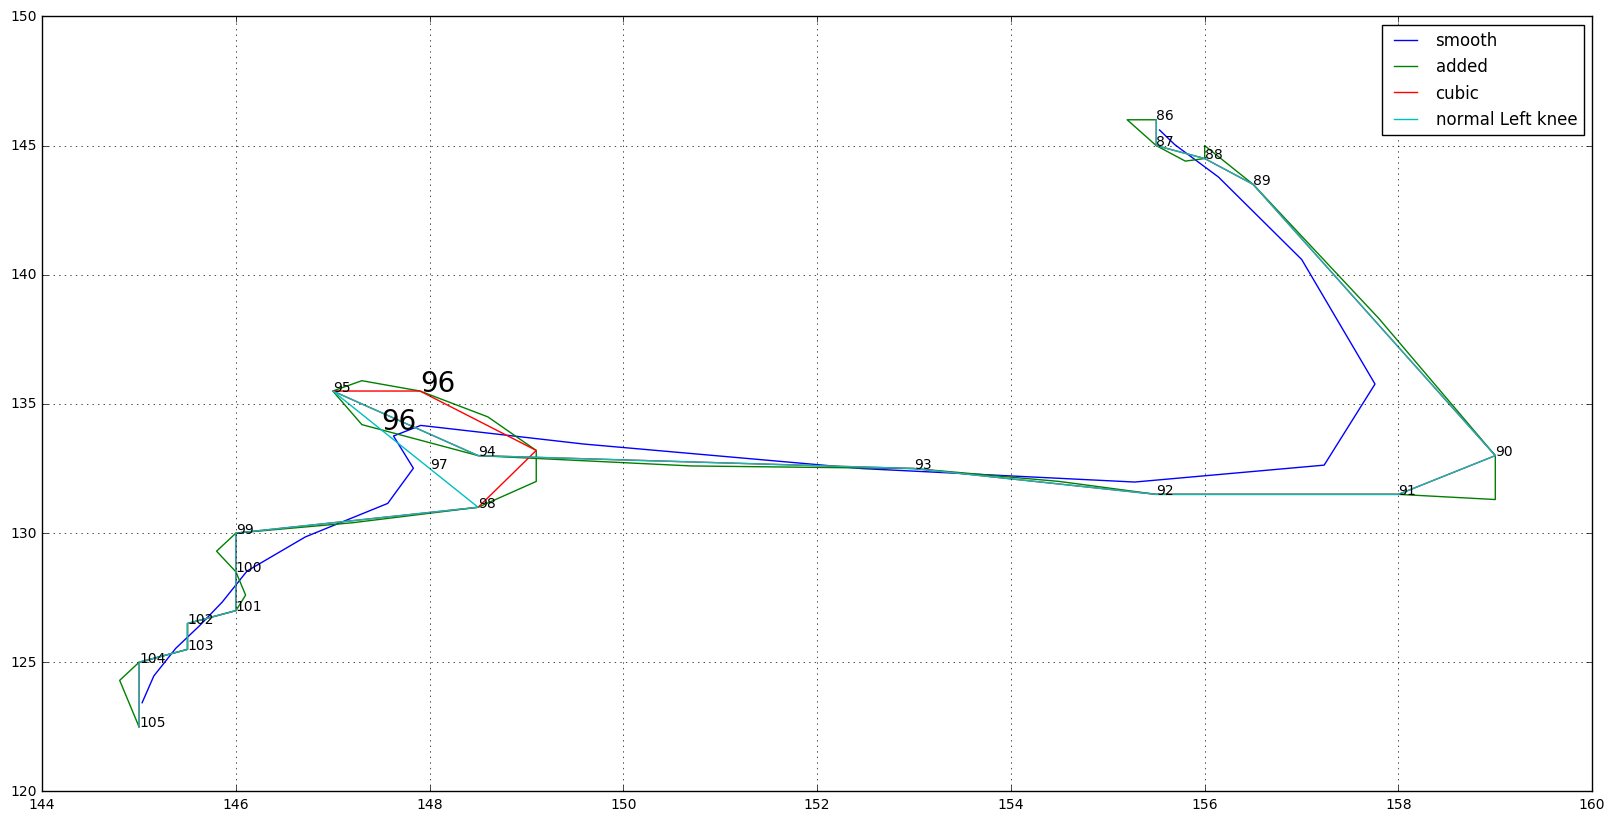

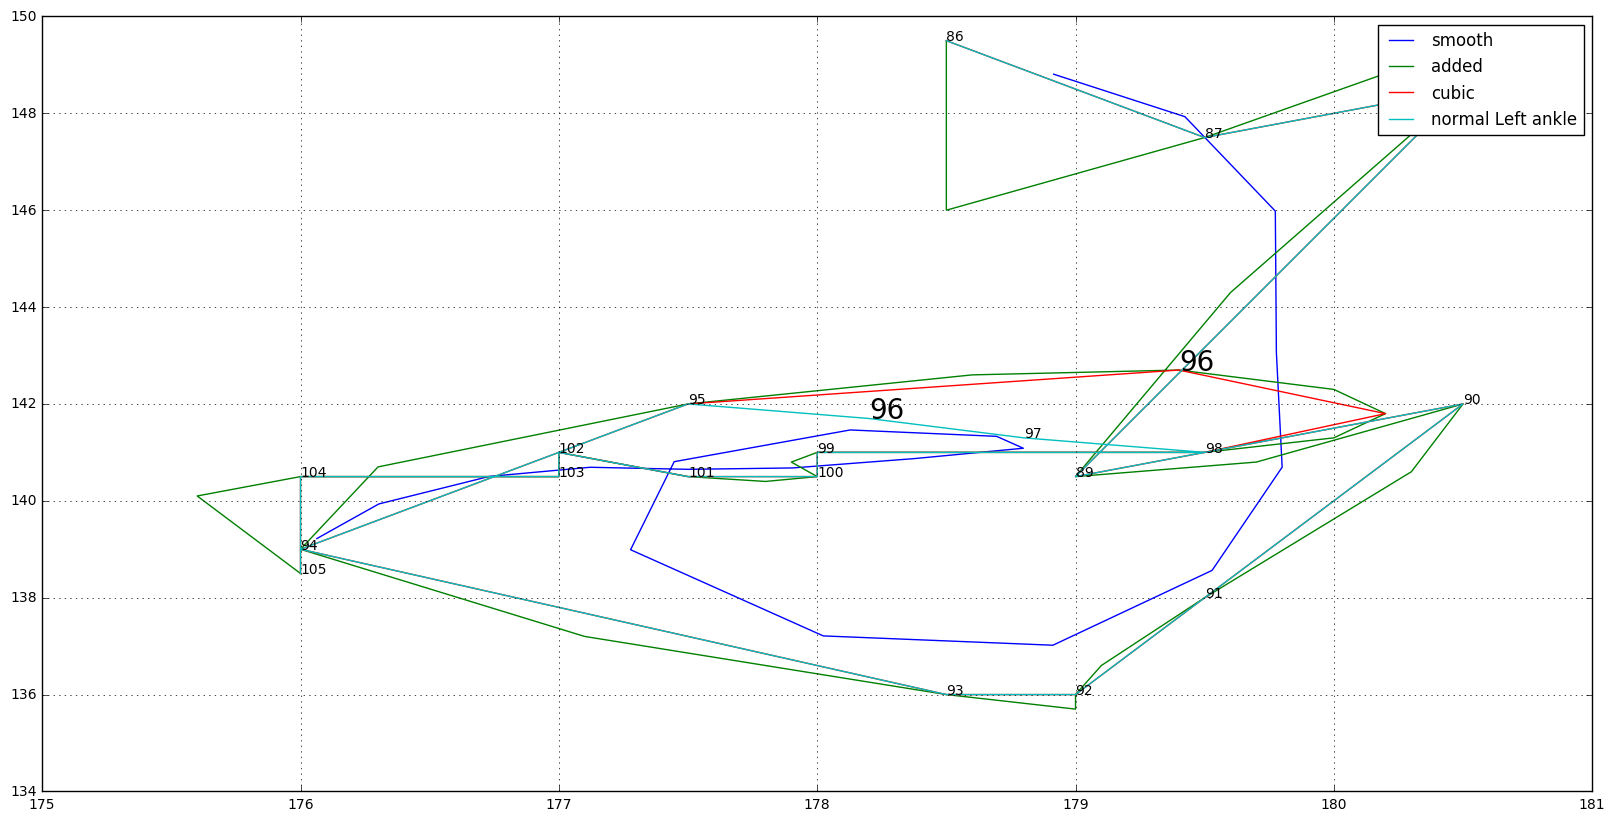

'\n# test normalization\nfrom tools import Tools\nnorm = Tools.normalize(data)\nnorm_ex = Tools.normalize(np.expand_dims(linear, 0))[0] #np.array(norm[DATA_EX])\nplt.figure(figsize =(20,10))\nfor i in range(1):\n    print(norm_ex[START:END, i, 0])\n    plt.plot(norm_ex[START:END, i, 0], norm_ex[START:END, i, 1])\nplt.show()'

In [44]:
joints=["Right shoulder", "Left shoulder", "Right elbow", "Right wrist","Left elbow", "Left wrist",
        "Right hip", "Right knee", "Right ankle", "Left hip", "Left knee", "Left ankle", "Neck ", 
        "Right eye", "Right ear","Left eye", "Left ear"]
#print(data[540, 92:95])
possible_interpo = ["linear", "nearest", "zero", "slinear", "quadratic", "cubic’ where ‘zero", "cubic"]
inter = 6
DATA_EX = 773
FRAME = 96
RANGE = 10
START = FRAME-RANGE
END = FRAME+RANGE
example = np.array(data[DATA_EX])
linear = example.copy()
cubic = example.copy()
smooth = example.copy()
not_zer = np.where(example[START:END, 1, 0]!=0)[0]
N,j, co = example.shape
smo2 = np.zeros((N*2, j, co))
#print(smo2.shape)
indices = np.arange(0, END-START, 1)
ind_twice = np.arange(0, (END-START)-0.5, 0.5)

for i in range(12):
    for j in range(2):
        #print(not_zer, example[not_zer+START, i,j], indices)
        #print(not_zer*2, example[not_zer+START, i,j], ind_twice)
        f = interpolate.interp1d(not_zer, example[not_zer+START, i,j], kind=possible_interpo[inter])
        cubic[START:END, i, j] = np.round(f(indices), 1)
        new = np.round(np.interp(indices, not_zer, example[not_zer+START,i,j]),1)
        new2= interpolate.interp1d(not_zer, example[not_zer+START, i,j], kind=possible_interpo[inter])
        linear[START:END, i, j] =  new
        smooth[START:END, i, j] = ndimage.filters.gaussian_filter1d(new, sigma = 1)
        #print(ind_twice, new2, len(not_zer*2), len(example[not_zer+START, i,j]))
        smo2[(START-RANGE):(END+RANGE)-1, i, j]= np.round(f(ind_twice),1)
START_JOINT = 0

for i in range(12):
    
    fig = plt.figure(figsize = (20,10))
    ax = fig.add_subplot(111)
    meX = linear[START:END, i, 0]
    meY = linear[START:END, i, 1]
    cuX = cubic[START:END, i, 0]
    cuY = cubic[START:END, i, 1]
    smX = smooth[START:END, i, 0]
    smY = smooth[START:END, i, 1]
    soX = smo2[START-RANGE:END+RANGE-1, i, 0]
    soY = smo2[START-RANGE:END+RANGE-1, i, 1]
    plt.plot(smX, smY, label = "smooth")
    plt.plot(soX, soY, label = "added")
    plt.plot(cuX, cuY, label = possible_interpo[inter])
    plt.plot(meX, meY, label="normal "+joints[START_JOINT+i])
    for k in range(START,END): 
        if k==FRAME:
            ax.annotate(str(k), (meX[k-START], meY[k-START]), size=20)
            ax.annotate(str(k), (cuX[k-START], cuY[k-START]), size=20)
        else:
            ax.annotate(str(k), (meX[k-START], meY[k-START]))
    #if (i+1)%6==0:
    plt.grid()
    plt.legend()
    plt.show()
    
"""
# test normalization
from tools import Tools
norm = Tools.normalize(data)
norm_ex = Tools.normalize(np.expand_dims(linear, 0))[0] #np.array(norm[DATA_EX])
plt.figure(figsize =(20,10))
for i in range(1):
    print(norm_ex[START:END, i, 0])
    plt.plot(norm_ex[START:END, i, 0], norm_ex[START:END, i, 1])
plt.show()"""

In [118]:
print(data.shape)
from data_preprocess import Preprocessor
prepro = Preprocessor("unprocessed_data.csv")
prepro.remove_small_classes(50)
print(prepro.cf.shape)

(6422, 167, 18, 2)


/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (254,255,256,257,258,259,260,290) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


csv eingelesen with length  13150
Only Pitcher rows
[['Changeup' 491]
 ['Curveball' 627]
 ['Eephus' 1]
 ['Fastball (2-seam)' 1341]
 ['Fastball (4-seam)' 2075]
 ['Fastball (Cut)' 287]
 ['Fastball (Split-finger)' 49]
 ['Knuckle curve' 73]
 ['Knuckleball' 350]
 ['Sinker' 265]
 ['Slider' 913]
 ['Unknown Pitch Type' 103]]
Removed because not enought class members:  ['Eephus' 'Fastball (Split-finger)'] Unknown Pitch Type
(6422, 445)


In [120]:
print(prepro.cf.iloc[DATA_EX]["Game"])

import cv2 
import ast
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from os import listdir
import pandas as pd

path = "/Volumes/Nina Backup/videos/atl/"
#path_input_dat = "/Volumes/Nina Backup/videos/atl/2017-04-14/center field/490251-0f308987-60b4-480c-89b7-60421ab39106.mp4.dat"


dates = "2017-07-16" #, "2017-04-18", "2017-05-02", "2017-05-06"] # , "2017-05-19", "2017-05-23", "2017-06-06", "2017-06-10", "2017-06-18", "2017-06-22", "2017-07-04", "2017-07-16",
# "2017-04-15", "2017-04-19", "2017-05-03", "2017-05-07", "2017-05-20", "2017-05-24", "2017-06-07", "2017-06-11", "2017-06-19", "2017-06-23", "2017-07-05", "2017-07-17"]
# only first two rows von den im cluster angezeigten
# output_folder=args.output_dir

output = []

file = prepro.cf.iloc[DATA_EX]["Game"] + ".mp4" #491465-1a697776-fcf9-4a5e-817e-c38f975a6ce8.mp4"
input_dir = path+dates+"/center field/"
video_capture = cv2.VideoCapture(input_dir+file)
game_id = file[:-4]

for i in open(input_dir+file+".dat").readlines():
    datContent=ast.literal_eval(i)

bottom_p=datContent['Pitcher']['bottom']
left_p=datContent['Pitcher']['left']
right_p=datContent['Pitcher']['right']
top_p=datContent['Pitcher']['top']
bottom_b=datContent['Batter']['bottom']
left_b=datContent['Batter']['left']
right_b=datContent['Batter']['right']
top_b=datContent['Batter']['top']
#center_dic['Pitcher']=np.array([abs(top_p-bottom_p)/2., abs(left_p-right_p)/2.])
#center_dic['Batter']=np.array([abs(top_b-bottom_b)/2., abs(left_b-right_b)/2.])
frames = np.zeros((167, 221, 290, 3))
i = 0
while True:
    ret, frame = video_capture.read()
    if frame is None:
        break
    pitcher = frame[top_p:bottom_p, left_p:right_p]
    # batter = frame[top_b:bottom_b, left_b:right_b]
    frames[i]= pitcher
    i+=1

output.append(frames)

491465-0f526b55-4fad-446a-beeb-2c801c7aafef


(167, 221, 290, 3)


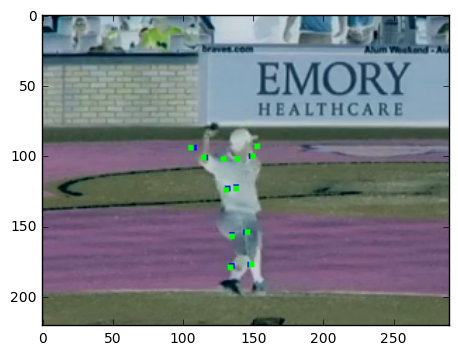

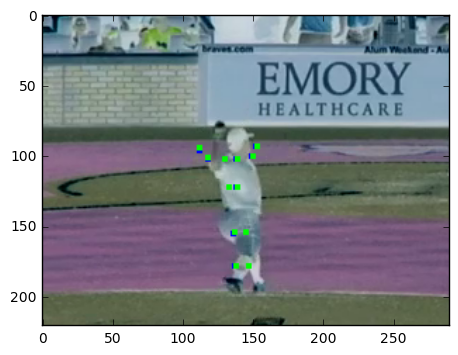

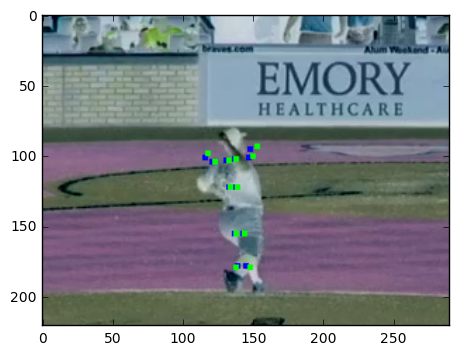

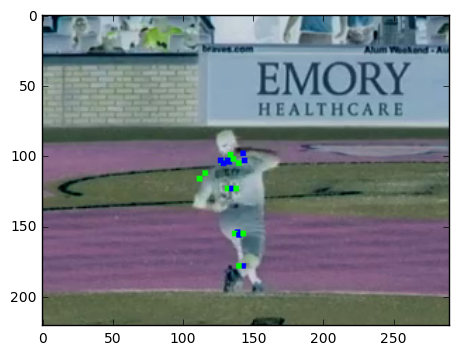

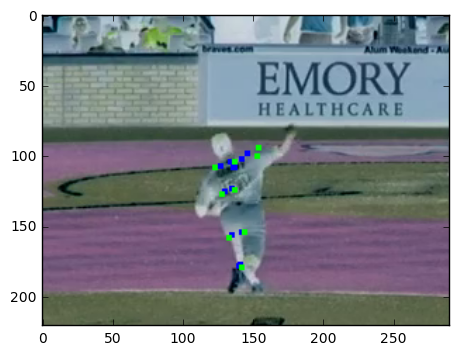

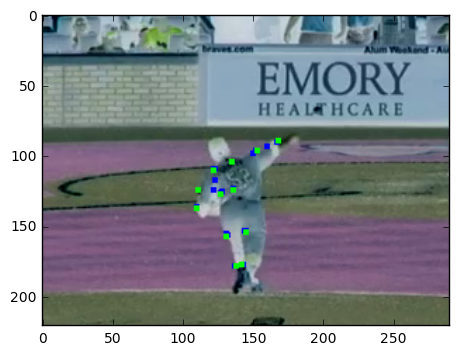

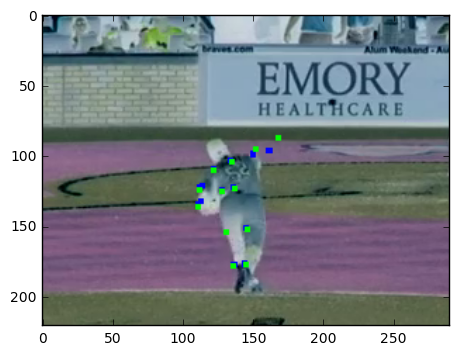

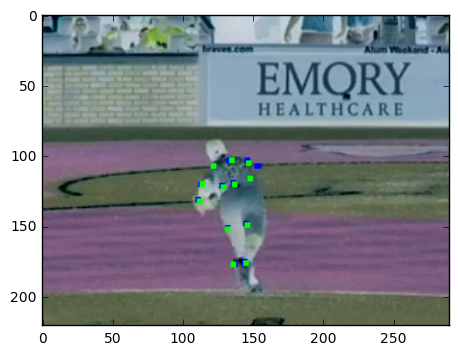

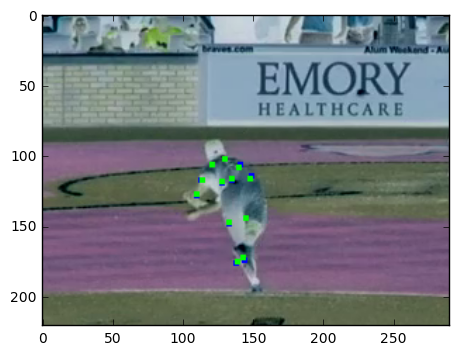

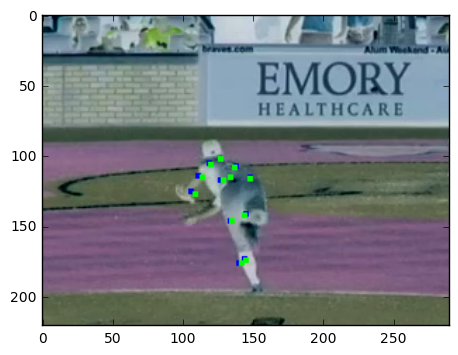

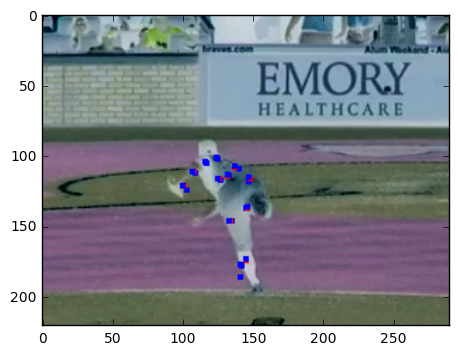

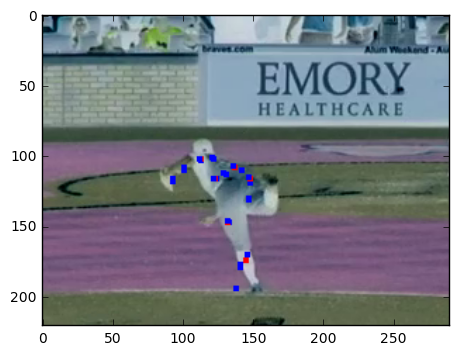

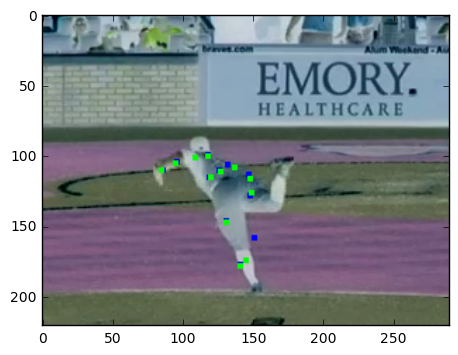

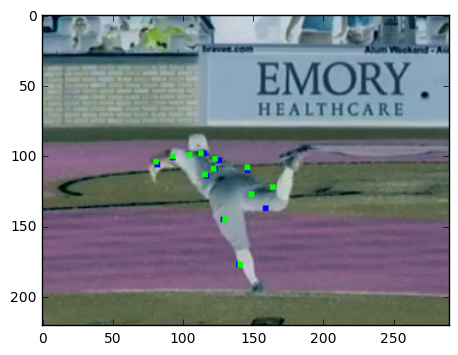

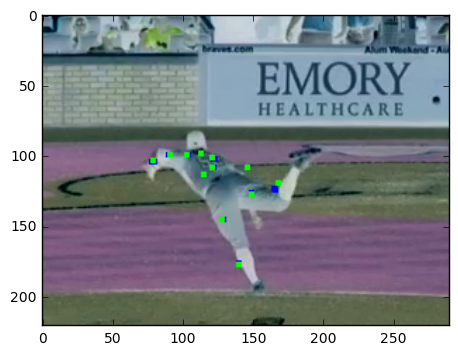

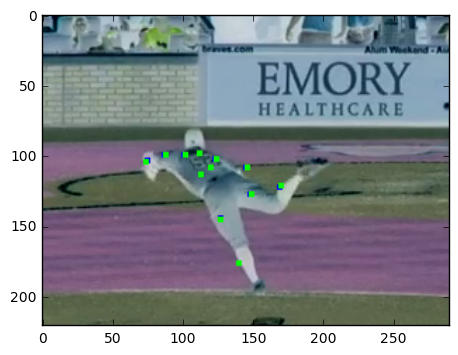

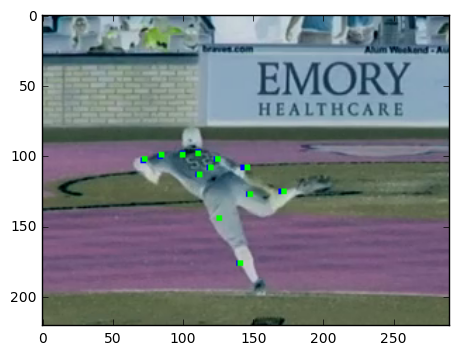

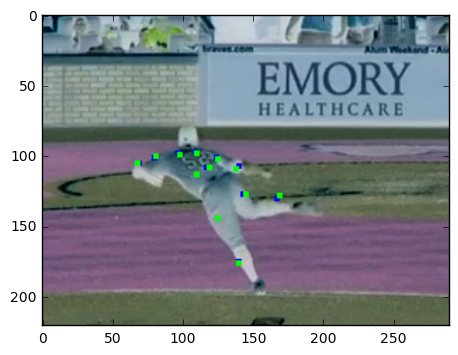

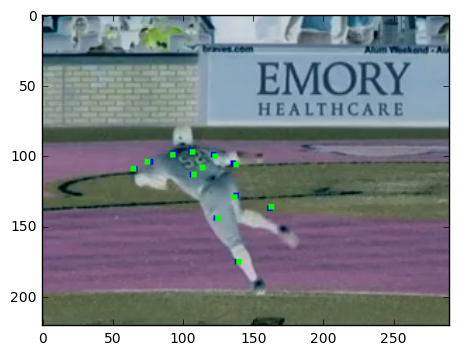

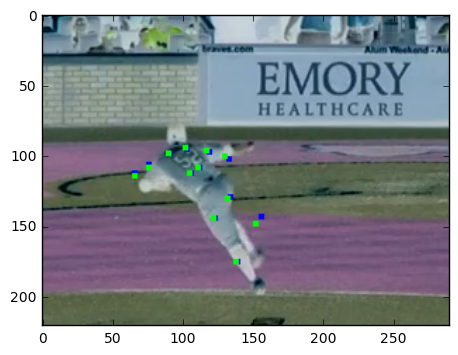

In [131]:
""" RED POINTS ARE SMOOTHED, GREEN UNPROCESSED"""
vid = output[0]
print(vid.shape)
for i in range(START, END):
    for j in range(12):
        x = linear[i, j, 0]
        y = linear[i,j,1]
        vid[i,int(x)-2:int(x)+2, int(y)-2:int(y)+2]=[1,0,0] # red
        x = smooth[i, j, 0]
        y = smooth[i,j,1]
        vid[i,int(x)-2:int(x)+2, int(y)-2:int(y)+2]=[0,0,1] # blue
        x = example[i, j, 0]
        y = example[i,j,1]
        vid[i,int(x)-2:int(x)+2, int(y)-2:int(y)+2]=[0,1,0] # green : normal
    plt.imshow(vid[i])
    plt.show()

(19, 24) (24,)
[ 2.80352576  2.24915626  1.45719983  0.74443904  0.26926519 -0.52269124
 -0.68108253 -0.83947381 -0.76027817 -0.76027817 -0.52269124 -0.36429996
 -0.36429996 -0.28510431 -0.52269124 -0.52269124 -0.52269124 -0.4434956
 -0.28510431] -0.852517


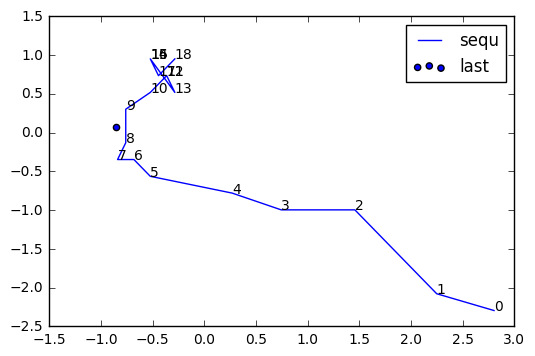

[ 2.86466198  2.06589691  1.55759187  0.6862118   0.32313678 -0.33039828
 -0.6934733  -0.91131832 -0.91131832 -0.76608831 -0.40301328 -0.25778327
 -0.25778327 -0.18516826 -0.47562829 -0.54824329 -0.54824329 -0.54824329
 -0.40301328] -0.949101


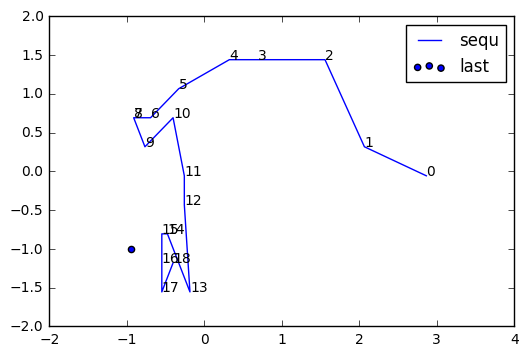

[ 1.77005785  1.42568861  1.42568861  1.42568861  1.42568861  1.42568861
 -1.12264369 -1.19151754 -0.84714831 -0.84714831 -0.64052677 -0.57165292
 -0.50277908 -0.50277908 -0.57165292 -0.57165292 -0.57165292 -0.50277908
 -0.29615754] -0.584867


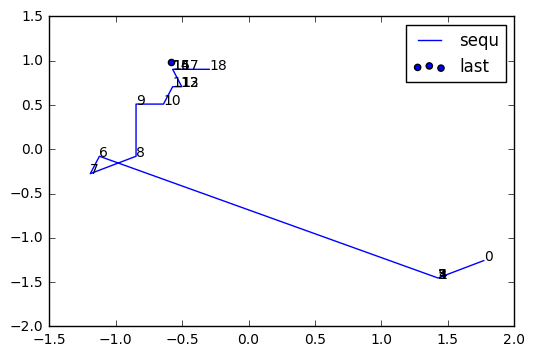

In [53]:
import numpy as np
import matplotlib.pylab as plt
s1 = np.load("seque_coord.npy")[1]
p1 = np.load("out_coord.npy")[1]
"""s1 = sequ[0]
s2 = sequ[1]
p1 = predicted[0]
p2 = predicted[1]"""
#print(s1, p1)
#fig = plt.figure(figsize=(20,10))
print(s1.shape, p1.shape)
for i in range(3):
    print(s1[:, 2*i], p1[2*i])
    ax = plt.subplot(111)
    plt.plot(s1[:, 2*i], s1[:, 2*i+1], label = "sequ")
    for k in range(len(s1)):
        ax.annotate(str(k), (s1[k, 2*i], s1[k, 2*i+1]))
    plt.scatter(p1[2*i], p1[2*i+1], label = "last")
    plt.legend()
    plt.show()

# Create one script for video-to-pitchtype processing

In [ ]:
"""
Problems: pytorch and tensorflow are somehow incompatible - once a pytorch model is started, 
creating a tensorflow session leads to a coredump because of an internal python memory error 
"""
('shape', (1, 167, 18, 2))
('Time to read in video and handle one:', 57.31005096435547)
('nach handle one shape --> all detected people in the frame', (167, 12, 18, 2))
('time for df_coordinates (selecting right player, fill in missing values...)', 27.217700958251953)
('shape input for ANN', (1, 167, 18, 2))
('Time for whole video to array step: ', 84.64371180534363)
('Time for array load and runner', 1.3805208206176758)
('predicted', ['Fastball (2-seam)'], 'truth', array(['Fastball (2-seam)'],dtype='|S17'), 'accuracy', 1.0
 
 OR:
 
 ('Time to read in video and handle one:', 61.53413200378418)
('time for df_coordinates', 31.455853939056396)
('shape', (1, 167, 18, 2))
('Time for array load and runner', 1.4578359127044678)
('vorhergesagt', ['Sinker'], 'truth', array(['Sinker'], dtype='|S6'), 'accuracy', 1.0
 
 Specific times:
 ('handle one1', 5.793571472167969e-05)
('handle one 2', 0.1919260025024414)
('handle one 3', 0.4836001396179199)
('handle one 4', 0.0747530460357666)
('handle one 5', 0.017817020416259766)
('handle one 6', 0.00047397613525390625)
 ('handle one1', 2.002716064453125e-05)
('handle one 2', 0.002607107162475586)
('handle one 3', 0.10315203666687012)
('handle one 4', 0.0741269588470459)
('handle one 5', 0.018039941787719727)
('handle one 6', 0.0005102157592773438)
 ('Time to read in video and handle one:', 61.37848711013794)
('Time for player_localization: ', 0.08333992958068848)
('Time for player_localization: ', 0.05714106559753418)
('Time for player_localization: ', 0.050184011459350586)
 ('Time for mix right left', 0.025226116180419922)
('Time for mix right left', 0.0242462158203125)
('Time for mix right left', 0.02407217025756836)
('Time for mix right left', 0.02440786361694336)
 ('Time for continuity ', 8.715142965316772)
('Time for continuity ', 8.832612991333008)
('time for df_coordinates', 35.55333495140076)
('Time for whole video to array: ', 97.31024312973022)
('Time for array load and runner', 1.3065440654754639)
('vorhergesagt', ['Sinker'], 'truth', array(['Sinker'], dtype='|S6'), 'accuracy', 1.0)
 --> Continuity is slow and does not work well